In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pylab as plt

import xlwt
from xlwt import Workbook
import xlsxwriter

# from skfeature.function.similarity_based.fisher_score import fisher_score, feature_ranking
# from skfeature.function.similarity_based.reliefF import reliefF


# setup plotting
plt.style.use('ggplot')

In [2]:
# -----------------------------------------------------------------------
# # setup program constants 
# percentage of poisoning levels  
POI_RNG = [.01, .025, .05, .075, .1, .125, .15, .175, .2]
#COMP_RNG = [0, .01, .025, .05, .075, .1, .125, .15, .175, .2]
# total number of poisoning levels 
NPR = len(POI_RNG)
# percentage of features that we want to select 
SEL_PERCENT = .3
# number of algorithms that we are going to test [JMI, MIM, MRMR, MIFS]
NALG = 6
# used when we select features 
FEAT_IDX = 0
# number of cross validation runs to perform
CV = 15
# dataset names 
# did not run 
#   - bank, miniboone, ozone, spambase, connect-4, oocytes_merluccius_nucleus_4d
DATA = ['breast-cancer-wisc-prog',
        'conn-bench-sonar-mines-rocks',
        'ionosphere',
#         'bank',
#         'oocytes_trisopterus_nucleus_2f', 
#         'statlog-german-credit', 
        'molec-biol-promoter', 
#         'ozone', 
#         'spambase',
#         'parkinsons', 
#         'oocytes_merluccius_nucleus_4d',
         'musk-1', 
#         'musk-2', 
#         'chess-krvkp', 
         'twonorm'
        ]
BOX = ['0.5'] #, '1', '2', '5', '10']
ALGS = ['MIM', 'MIFS', 'MRMR', 'JMI', 'CMIM', 'DISR', 'ICAP']
# -----------------------------------------------------------------------

clrs = ['g', 'y', 'b', 'r', 'c', 'm', 'y']
#mkrs = ['*', 's', 'o', '^']

In [9]:
data = 'breast-cancer-wisc-prog'
#BOX = 10
d = np.load('IEEE/All7_info-theoretic_algs/results/' + data + '_[xiao][10]_results.npz')
consis_jaccard_clean, consis_kuncheva_clean, consis_jaccard_adv, consis_kuncheva_adv, Xa, X_pois= d['consis_jaccard_clean'], d['consis_kuncheva_clean'], d['consis_jaccard_adv'], d['consis_kuncheva_adv'], d['Xa'], d['Xtrk_pois']
Jaccard_consistency = np.vstack((consis_jaccard_clean, consis_jaccard_adv))
Kuncheva_consistency = np.vstack((consis_kuncheva_clean, consis_kuncheva_adv))
print(" Shape of Xa\n", Xa.shape)
print("X_a\n", Xa)


 Shape of Xa
 (59, 33)
X_a
 [[ 10.          -4.29476327  10.         ...   1.52560472 -10.
  -10.        ]
 [ 10.           1.20392764  10.         ...  -4.60757122 -10.
  -10.        ]
 [ 10.          -2.48807307   9.99999795 ...  -3.40301115 -10.
  -10.        ]
 ...
 [ 10.           0.71983116  10.         ...  -4.30162579 -10.
  -10.        ]
 [ 10.          -3.67780394  10.         ...  -1.78033972 -10.
  -10.        ]
 [ 10.          -4.00178531  10.         ...  -3.5613757  -10.
  -10.        ]]


# Excel File generator

In [16]:
# Change the name of data for each run: breast-cancer-wisc-prog, conn-bench-sonar-mines-rocks, molec-biol-promoter, ionosphere, twonorm, musk-1
ALGS = ['MIM', 'MIFS', 'MRMR', 'DISR', 'Relief', 'Fisher']
data = 'twonorm'

for i in range(len(BOX)): 
    OUTPUT_FILE = ''.join(['results/newconfig/Excel_sheets/', data, '_', BOX[i], '.xls'])
    d = np.load('results/newconfig/npz_files/' + data + '_[xiao][' + BOX[i] + ']_results.npz')
    dist_jaccard, dist_kuncheva, consis_jaccard_clean, consis_kuncheva_clean, consis_jaccard_adv, consis_kuncheva_adv, Xa, X_pois= d['dist_jaccard'], \
    d['dist_kuncheva'], d['consis_jaccard_clean'], d['consis_kuncheva_clean'], d['consis_jaccard_adv'], d['consis_kuncheva_adv'], d['Xa'], d['Xtrk_pois']
    
    wb = Workbook()
    sheet1 = wb.add_sheet('Jaccard Distance')
    for a in range(NPR):
        for b in range(len(ALGS)):
            sheet1.write(a, b, dist_jaccard[a, b])
            
    sheet2 = wb.add_sheet('Kuncheva Distance')
    for a in range(NPR):
        for b in range(len(ALGS)):
            sheet2.write(a, b, dist_kuncheva[a, b])
            
    sheet3 = wb.add_sheet('Jaccard Consistency Clean')
    for a in range(1):
        for b in range(len(ALGS)):
            sheet3.write(a, b, consis_jaccard_clean[a, b])
    
    sheet4 = wb.add_sheet('Kuncheva Consistency Clean')
    for a in range(1):
        for b in range(len(ALGS)):
            sheet4.write(a, b, consis_kuncheva_clean[a, b])
    
    sheet5 = wb.add_sheet('Jaccard Consistency Adv')
    for a in range(NPR):
        for b in range(len(ALGS)):
            sheet5.write(a, b, consis_jaccard_adv[a, b])
            
    sheet6 = wb.add_sheet('Kuncheva Consistency Adv')
    for a in range(NPR):
        for b in range(len(ALGS)):
            sheet6.write(a, b, consis_kuncheva_adv[a, b])
    
    wb.save(OUTPUT_FILE)


(10, 7)
(10, 7)
(10, 7)
(10, 7)
(10, 7)


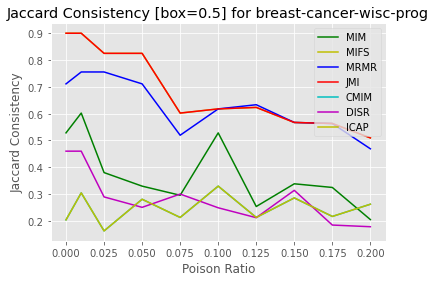

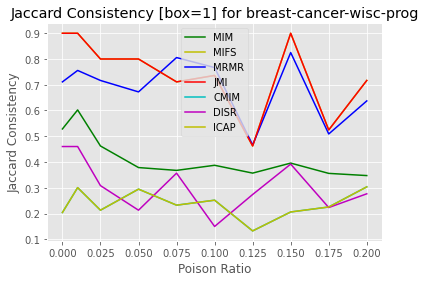

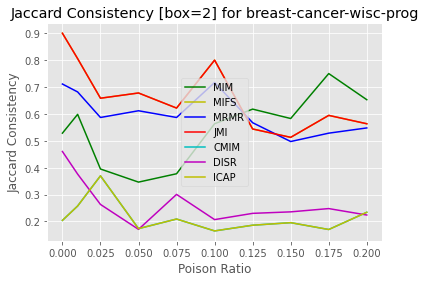

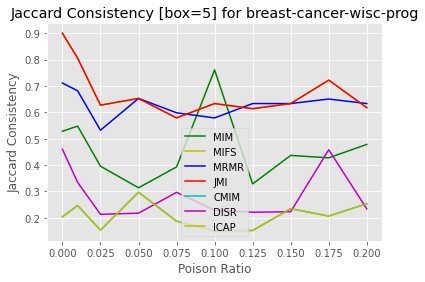

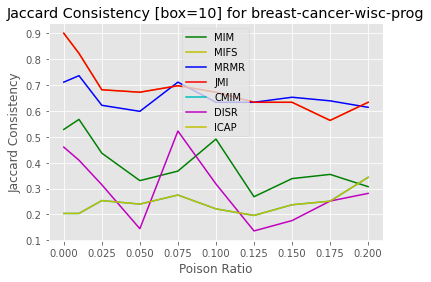

In [40]:
# Here I am concatenating clean and adversarial consistency, or in other words, the matrix "Jaccard consistency" hold
# consistencies from 0% (clean data) to adversarial data

data = 'breast-cancer-wisc-prog'
for i in range(len(BOX)): 
    d = np.load('IEEE/All7_info-theoretic_algs/results/' + data + '_[xiao][' + BOX[i] + ']_results.npz')
    consis_jaccard_clean, consis_kuncheva_clean, consis_jaccard_adv, consis_kuncheva_adv, Xa, X_pois= d['consis_jaccard_clean'], d['consis_kuncheva_clean'], d['consis_jaccard_adv'], d['consis_kuncheva_adv'], d['Xa'], d['Xtrk_pois']
    Jaccard_consistency = np.vstack((consis_jaccard_clean, consis_jaccard_adv))
    Kuncheva_consistency = np.vstack((consis_kuncheva_clean, consis_kuncheva_adv))
    
    print(Jaccard_consistency.shape)
    plt.figure()
    for j in range(Jaccard_consistency.shape[1]): 
            plt.plot(COMP_RNG, Jaccard_consistency[:,j], color=clrs[j], label=ALGS[j])
    plt.legend()
    plt.xlabel('Poison Ratio')
    plt.ylabel('Jaccard Consistency')
    plt.title('Jaccard Consistency [box=' + BOX[i] + '] for '+ data)

# Line graph generator

## breast-cancer-wisc-prog

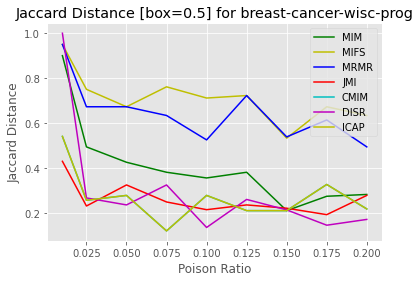

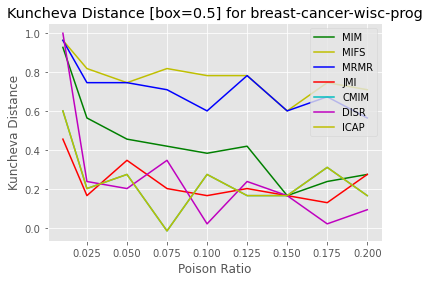

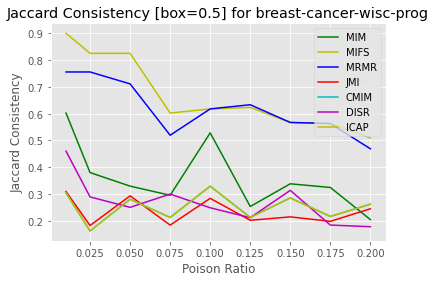

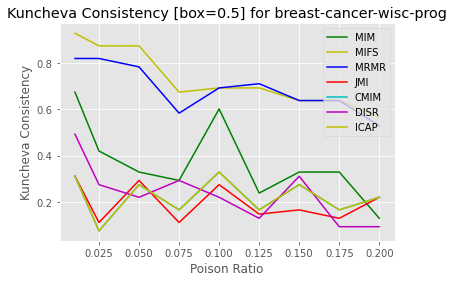

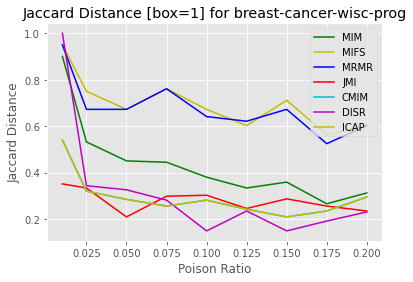

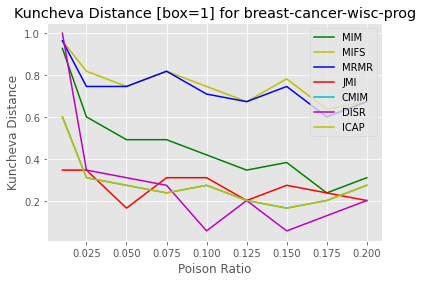

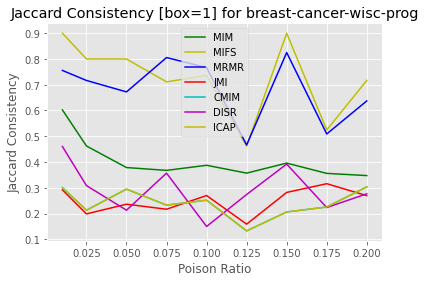

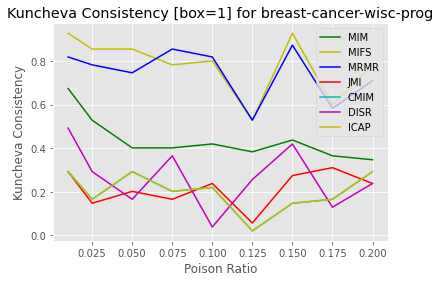

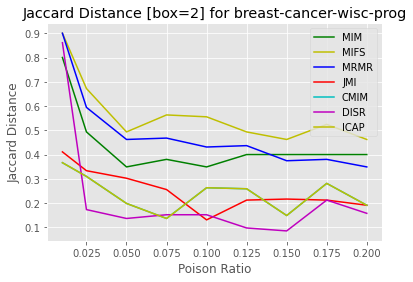

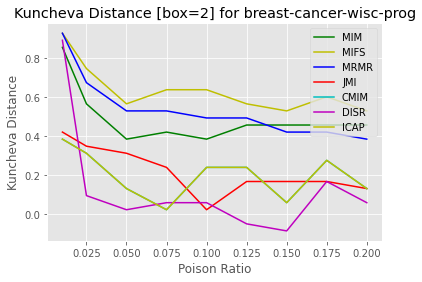

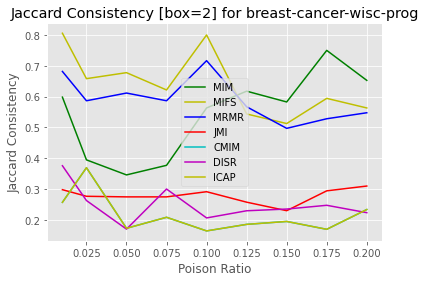

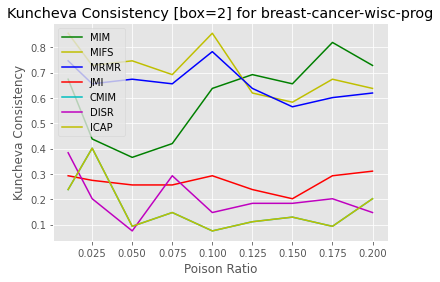

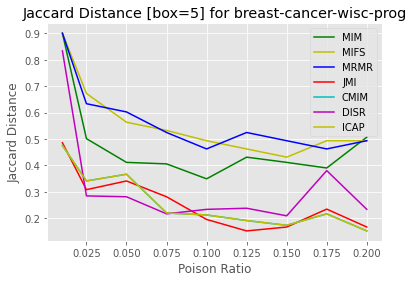

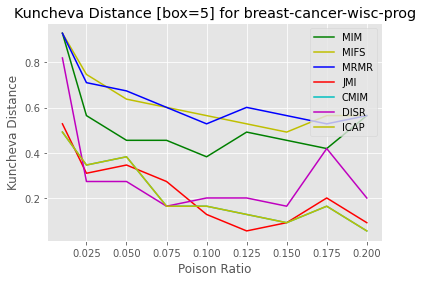

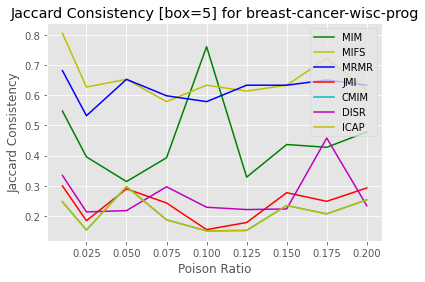

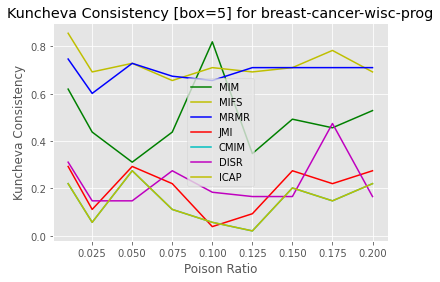

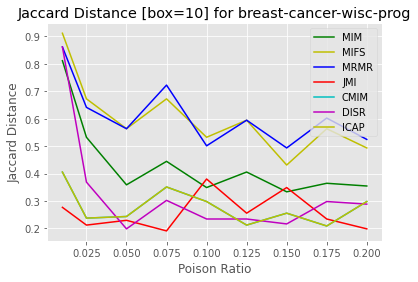

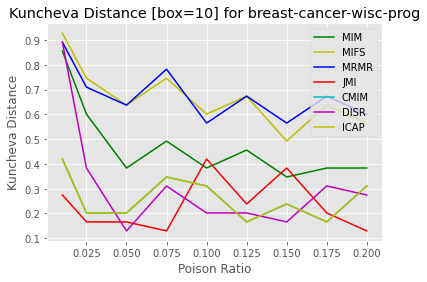

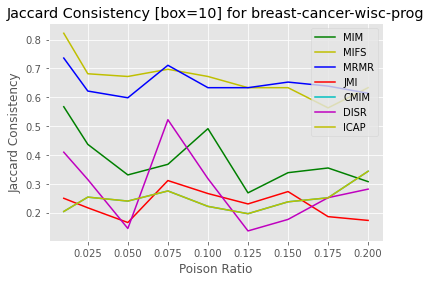

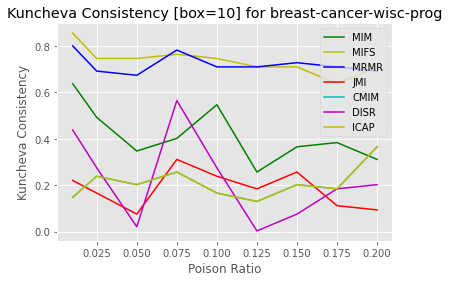

In [11]:
data = 'breast-cancer-wisc-prog'
NALG = 7
ALGS = ['MIM', 'MIFS', 'MRMR', 'JMI', 'CMIM', 'DISR', 'ICAP']
for i in range(len(BOX)): 
    d = np.load('IEEE/All7_info-theoretic_algs/results/' + data + '_[xiao][' + BOX[i] + ']_results.npz')
    dist_jaccard, dist_kuncheva, consis_jaccard_clean, consis_kuncheva_clean, consis_jaccard_adv, consis_kuncheva_adv, Xa, X_pois= d['dist_jaccard'], \
    d['dist_kuncheva'], d['consis_jaccard_clean'], d['consis_kuncheva_clean'], d['consis_jaccard_adv'], d['consis_kuncheva_adv'], d['Xa'], d['Xtrk_pois']
    
    plt.figure()
    for j in range(dist_jaccard.shape[1]): 
        plt.plot(POI_RNG, dist_jaccard[:,j], color=clrs[j], label=ALGS[j], markersize=8)
    plt.legend()
    plt.xlabel('Poison Ratio')
    plt.ylabel('Jaccard Distance')
    plt.title('Jaccard Distance [box=' + BOX[i] + '] for '+ data)
    plt.savefig('IEEE/All7_info-theoretic_algs/line_graphs/breast-cancer-wisc-prog/dist_jaccard_' + BOX[i] + '].pdf')
        
    plt.figure()
    for j in range(dist_kuncheva.shape[1]): 
            plt.plot(POI_RNG, dist_kuncheva[:,j], color=clrs[j], label=ALGS[j])
    plt.legend()
    plt.xlabel('Poison Ratio')
    plt.ylabel('Kuncheva Distance')
    plt.title('Kuncheva Distance [box=' + BOX[i] + '] for '+ data)
    plt.savefig('IEEE/All7_info-theoretic_algs/line_graphs/breast-cancer-wisc-prog/dist_kuncheva_' + BOX[i] + '].pdf')
    
    plt.figure()
    for j in range(consis_jaccard_adv.shape[1]): 
            plt.plot(POI_RNG, consis_jaccard_adv[:,j], color=clrs[j], label=ALGS[j])
    plt.legend()
    plt.xlabel('Poison Ratio')
    plt.ylabel('Jaccard Consistency')
    plt.title('Jaccard Consistency [box=' + BOX[i] + '] for '+ data)
    plt.savefig('IEEE/All7_info-theoretic_algs/line_graphs/breast-cancer-wisc-prog/consis_jaccard_' + BOX[i] + '].pdf')
        
    plt.figure()
    for j in range(consis_kuncheva_adv.shape[1]): 
            plt.plot(POI_RNG, consis_kuncheva_adv[:,j], color=clrs[j], label=ALGS[j])
    plt.legend()
    plt.xlabel('Poison Ratio')
    plt.ylabel('Kuncheva Consistency')
    plt.title('Kuncheva Consistency [box=' + BOX[i] + '] for '+ data)
    plt.savefig('IEEE/All7_info-theoretic_algs/line_graphs/breast-cancer-wisc-prog/consis_kuncheva_'+ BOX[i] + '].pdf')

## twonorm

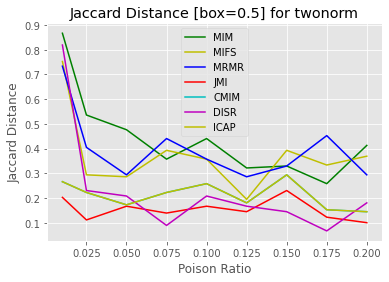

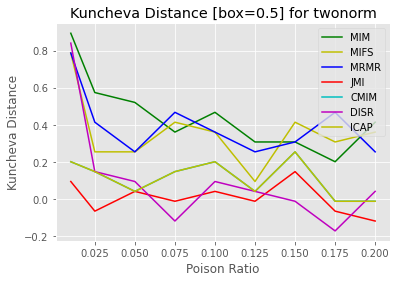

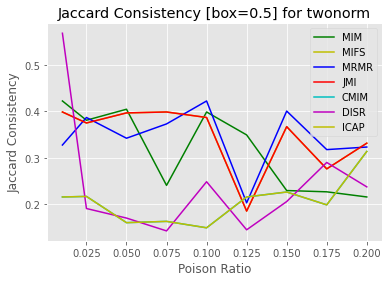

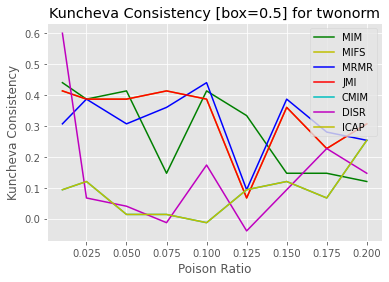

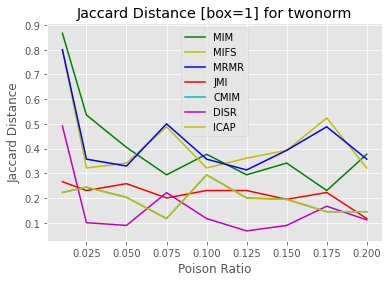

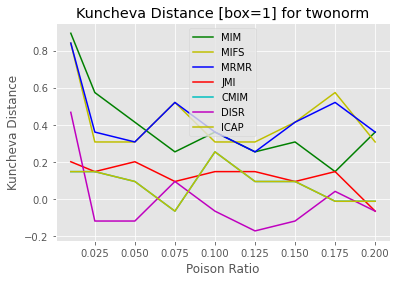

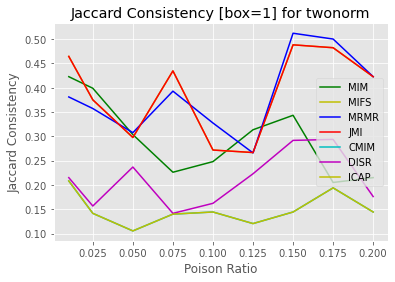

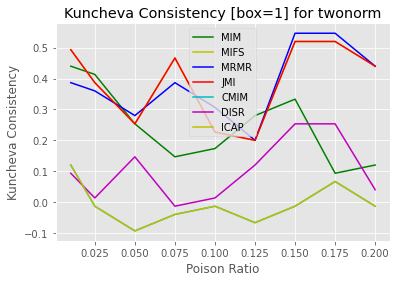

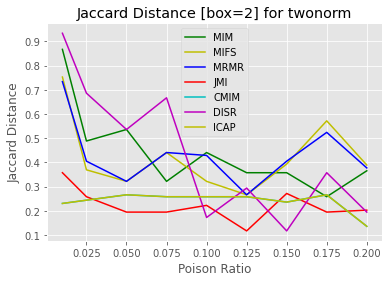

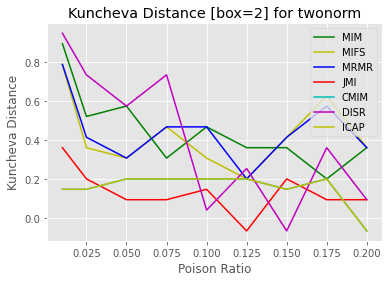

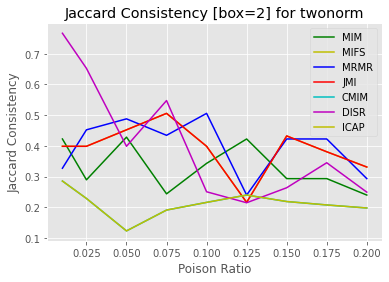

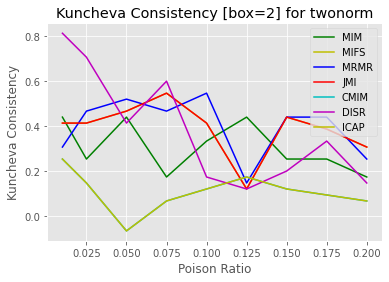

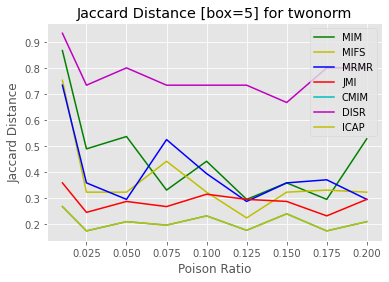

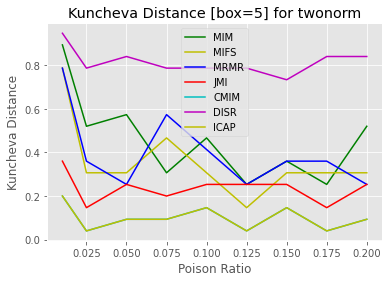

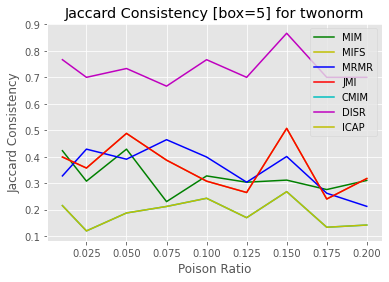

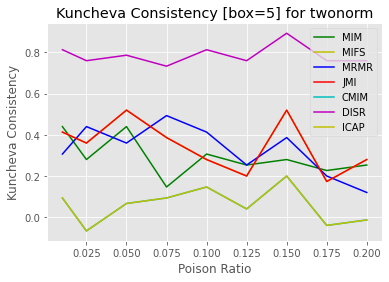

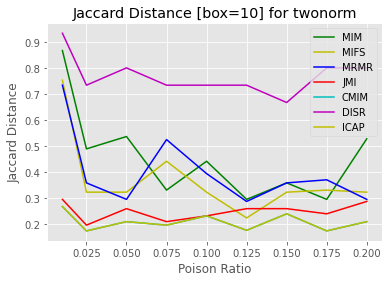

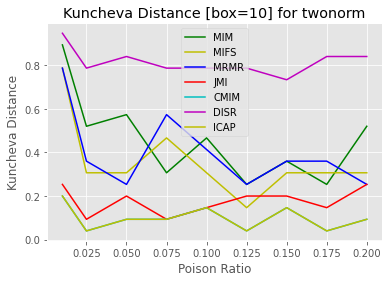

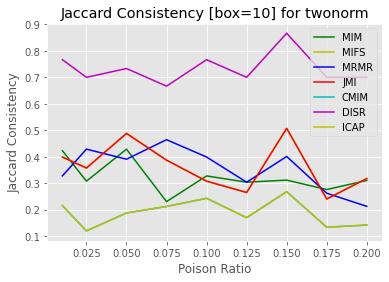

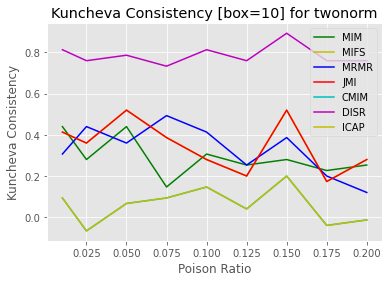

In [42]:
data = 'twonorm'
NALG = 7
ALGS = ['MIM', 'MIFS', 'MRMR', 'JMI', 'CMIM', 'DISR', 'ICAP']
for i in range(len(BOX)): 
    d = np.load('IEEE/All7_info-theoretic_algs/results/' + data + '_[xiao][' + BOX[i] + ']_results.npz')
    dist_jaccard, dist_kuncheva, consis_jaccard_clean, consis_kuncheva_clean, consis_jaccard_adv, consis_kuncheva_adv, Xa, X_pois= d['dist_jaccard'], \
    d['dist_kuncheva'], d['consis_jaccard_clean'], d['consis_kuncheva_clean'], d['consis_jaccard_adv'], d['consis_kuncheva_adv'], d['Xa'], d['Xtrk_pois']
    
    plt.figure()
    for j in range(dist_jaccard.shape[1]): 
        plt.plot(POI_RNG, dist_jaccard[:,j], color=clrs[j], label=ALGS[j], markersize=8)
    plt.legend()
    plt.xlabel('Poison Ratio')
    plt.ylabel('Jaccard Distance')
    plt.title('Jaccard Distance [box=' + BOX[i] + '] for '+ data)
    plt.savefig('IEEE/line_graphs/twonorm/dist_jaccard_' + BOX[i] + '].pdf')
        
    plt.figure()
    for j in range(dist_kuncheva.shape[1]): 
            plt.plot(POI_RNG, dist_kuncheva[:,j], color=clrs[j], label=ALGS[j])
    plt.legend()
    plt.xlabel('Poison Ratio')
    plt.ylabel('Kuncheva Distance')
    plt.title('Kuncheva Distance [box=' + BOX[i] + '] for '+ data)
    plt.savefig('IEEE/line_graphs/twonorm/dist_kuncheva_' + BOX[i] + '].pdf')
    
    plt.figure()
    for j in range(consis_jaccard_adv.shape[1]): 
            plt.plot(POI_RNG, consis_jaccard_adv[:,j], color=clrs[j], label=ALGS[j])
    plt.legend()
    plt.xlabel('Poison Ratio')
    plt.ylabel('Jaccard Consistency')
    plt.title('Jaccard Consistency [box=' + BOX[i] + '] for '+ data)
    plt.savefig('IEEE/line_graphs/twonorm/consis_jaccard_' + BOX[i] + '].pdf')
        
    plt.figure()
    for j in range(consis_kuncheva_adv.shape[1]): 
            plt.plot(POI_RNG, consis_kuncheva_adv[:,j], color=clrs[j], label=ALGS[j])
    plt.legend()
    plt.xlabel('Poison Ratio')
    plt.ylabel('Kuncheva Consistency')
    plt.title('Kuncheva Consistency [box=' + BOX[i] + '] for '+ data)
    plt.savefig('IEEE/line_graphs/twonorm/consis_kuncheva_'+ BOX[i] + '].pdf')

## molec-biol

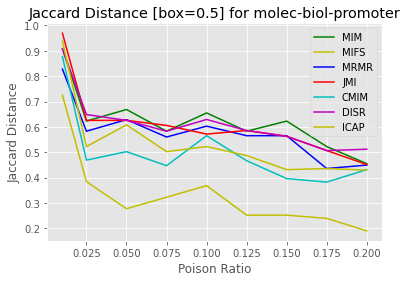

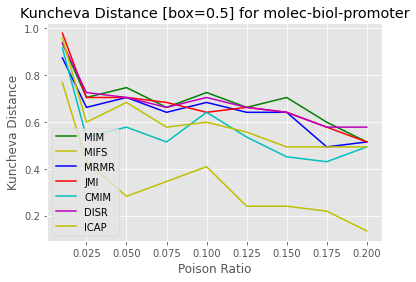

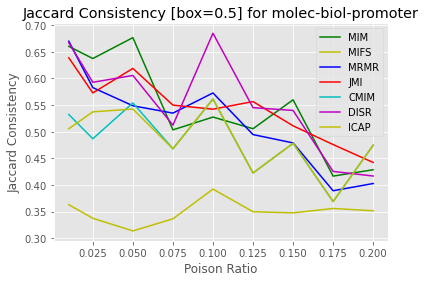

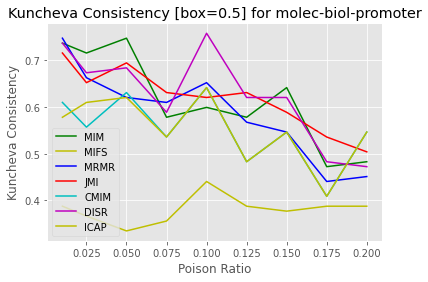

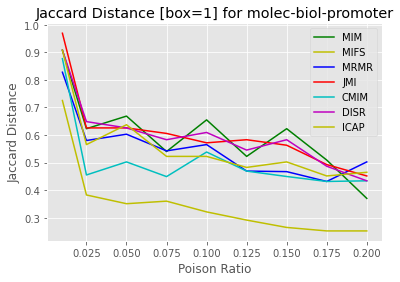

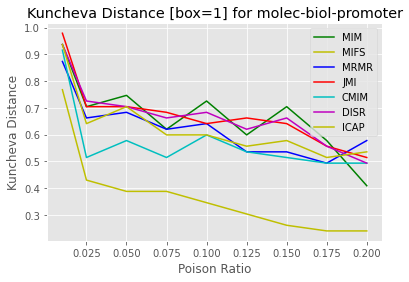

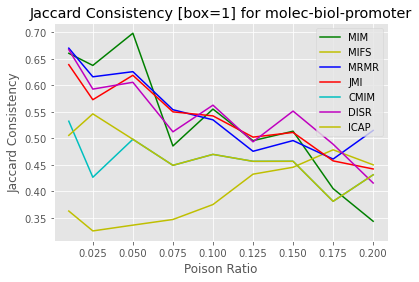

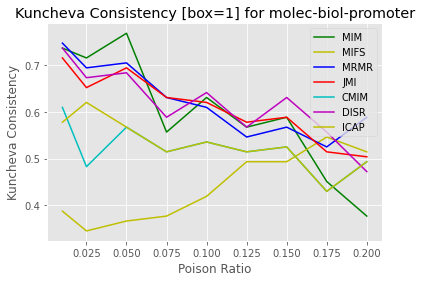

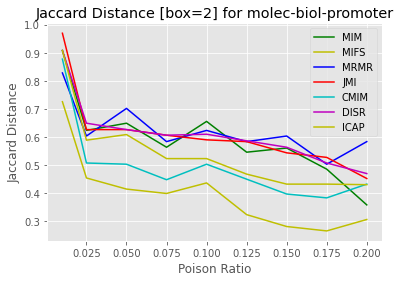

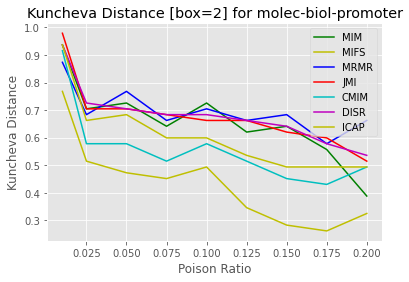

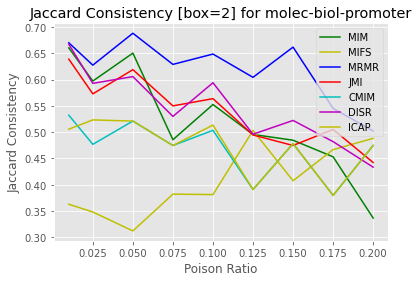

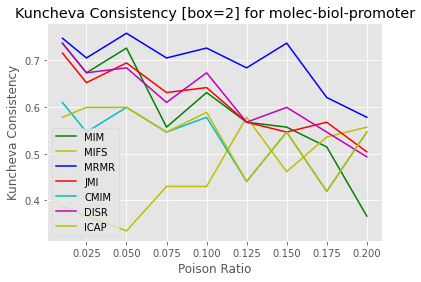

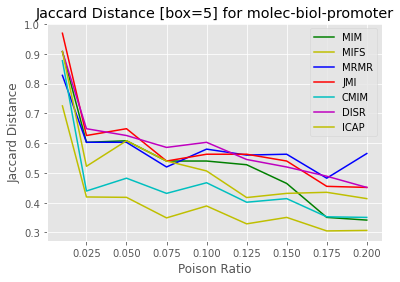

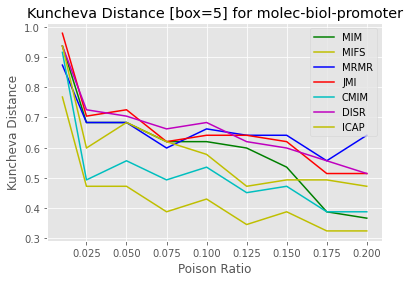

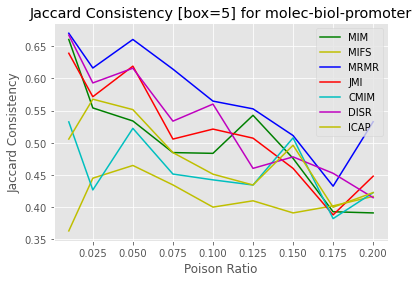

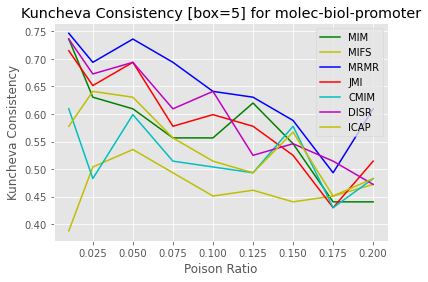

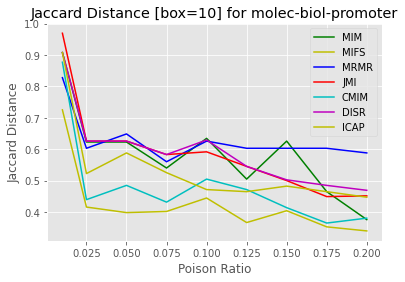

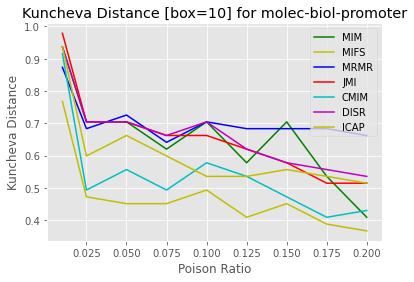

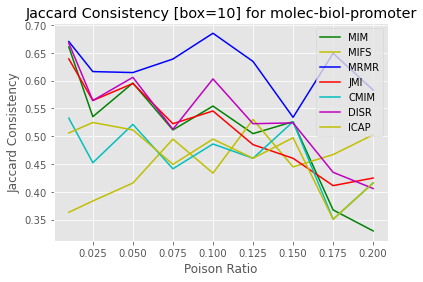

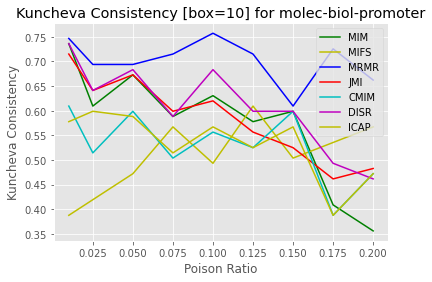

In [28]:
data = 'molec-biol-promoter'
NALG = 7
ALGS = ['MIM', 'MIFS', 'MRMR', 'JMI', 'CMIM', 'DISR', 'ICAP']
for i in range(len(BOX)): 
    d = np.load('IEEE/All7_info-theoretic_algs/results/' + data + '_[xiao][' + BOX[i] + ']_results.npz')
    dist_jaccard, dist_kuncheva, consis_jaccard_clean, consis_kuncheva_clean, consis_jaccard_adv, consis_kuncheva_adv, Xa, X_pois= d['dist_jaccard'], \
    d['dist_kuncheva'], d['consis_jaccard_clean'], d['consis_kuncheva_clean'], d['consis_jaccard_adv'], d['consis_kuncheva_adv'], d['Xa'], d['Xtrk_pois']
    
    plt.figure()
    for j in range(dist_jaccard.shape[1]): 
        plt.plot(POI_RNG, dist_jaccard[:,j], color=clrs[j], label=ALGS[j], markersize=8)
    plt.legend()
    plt.xlabel('Poison Ratio')
    plt.ylabel('Jaccard Distance')
    plt.title('Jaccard Distance [box=' + BOX[i] + '] for '+ data)
    plt.savefig('IEEE/All7_info-theoretic_algs/line_graphs/molec-biol/dist_jaccard_' + BOX[i] + '].pdf')
        
    plt.figure()
    for j in range(dist_kuncheva.shape[1]): 
            plt.plot(POI_RNG, dist_kuncheva[:,j], color=clrs[j], label=ALGS[j])
    plt.legend()
    plt.xlabel('Poison Ratio')
    plt.ylabel('Kuncheva Distance')
    plt.title('Kuncheva Distance [box=' + BOX[i] + '] for '+ data)
    plt.savefig('IEEE/All7_info-theoretic_algs/line_graphs/molec-biol/dist_kuncheva_' + BOX[i] + '].pdf')
    
    plt.figure()
    for j in range(consis_jaccard_adv.shape[1]): 
            plt.plot(POI_RNG, consis_jaccard_adv[:,j], color=clrs[j], label=ALGS[j])
    plt.legend()
    plt.xlabel('Poison Ratio')
    plt.ylabel('Jaccard Consistency')
    plt.title('Jaccard Consistency [box=' + BOX[i] + '] for '+ data)
    plt.savefig('IEEE/All7_info-theoretic_algs/line_graphs/molec-biol/consis_jaccard_' + BOX[i] + '].pdf')
        
    plt.figure()
    for j in range(consis_kuncheva_adv.shape[1]): 
            plt.plot(POI_RNG, consis_kuncheva_adv[:,j], color=clrs[j], label=ALGS[j])
    plt.legend()
    plt.xlabel('Poison Ratio')
    plt.ylabel('Kuncheva Consistency')
    plt.title('Kuncheva Consistency [box=' + BOX[i] + '] for '+ data)
    plt.savefig('IEEE/All7_info-theoretic_algs/line_graphs/molec-biol/consis_kuncheva_'+ BOX[i] + '].pdf')

## ionosphere

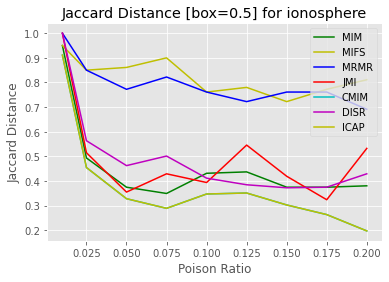

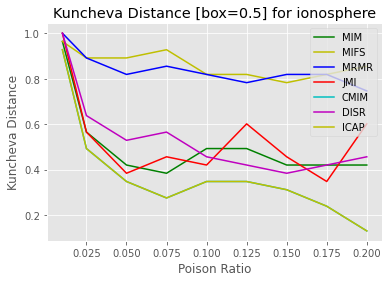

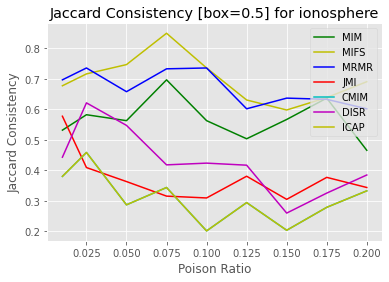

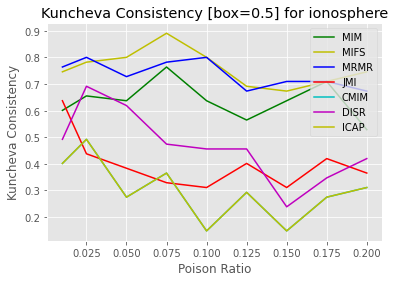

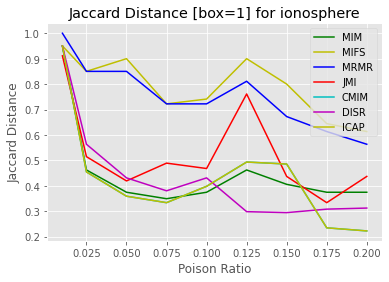

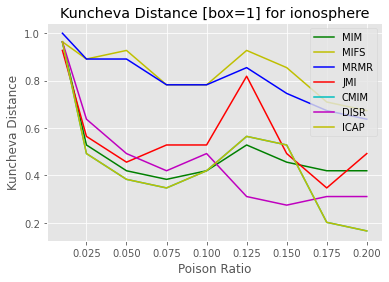

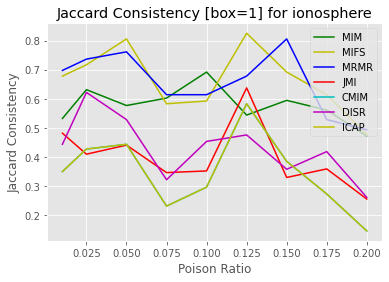

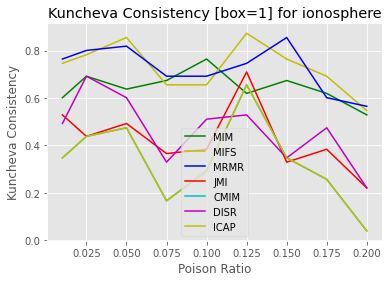

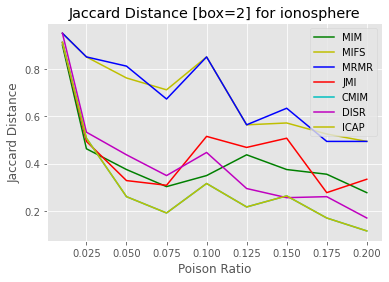

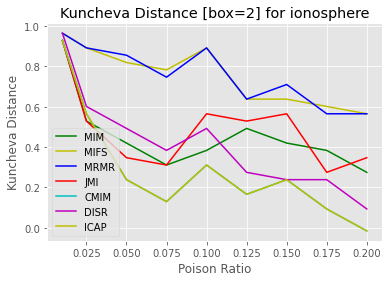

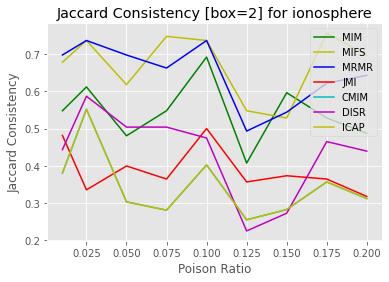

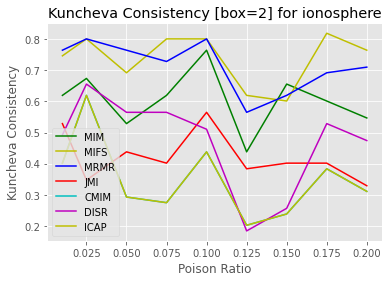

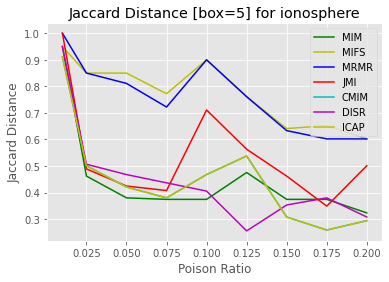

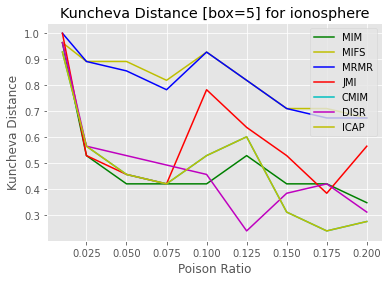

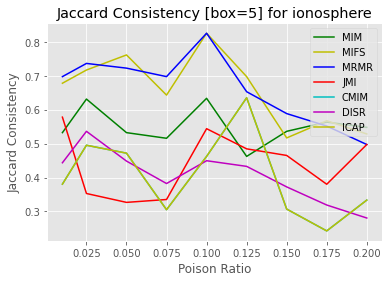

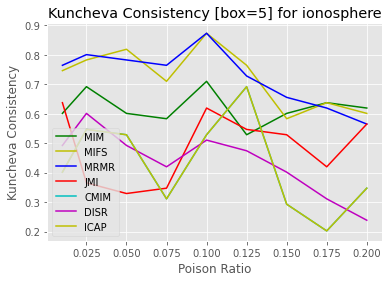

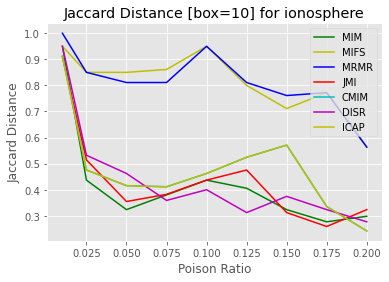

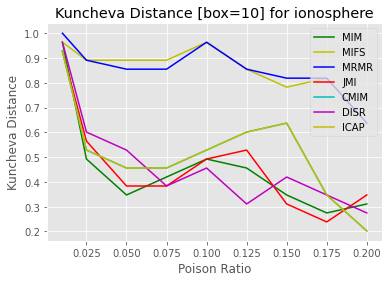

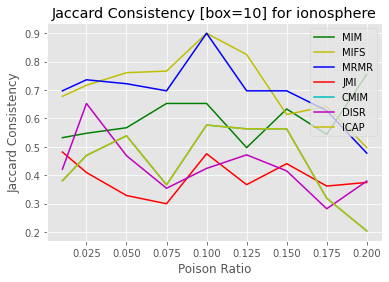

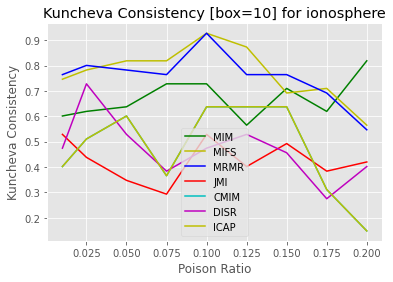

In [27]:
data = 'ionosphere'
NALG = 7
ALGS = ['MIM', 'MIFS', 'MRMR', 'JMI', 'CMIM', 'DISR', 'ICAP']
for i in range(len(BOX)): 
    d = np.load('IEEE/All7_info-theoretic_algs/results/' + data + '_[xiao][' + BOX[i] + ']_results.npz')
    dist_jaccard, dist_kuncheva, consis_jaccard_clean, consis_kuncheva_clean, consis_jaccard_adv, consis_kuncheva_adv, Xa, X_pois= d['dist_jaccard'], \
    d['dist_kuncheva'], d['consis_jaccard_clean'], d['consis_kuncheva_clean'], d['consis_jaccard_adv'], d['consis_kuncheva_adv'], d['Xa'], d['Xtrk_pois']
    
    plt.figure()
    for j in range(dist_jaccard.shape[1]): 
        plt.plot(POI_RNG, dist_jaccard[:,j], color=clrs[j], label=ALGS[j], markersize=8)
    plt.legend()
    plt.xlabel('Poison Ratio')
    plt.ylabel('Jaccard Distance')
    plt.title('Jaccard Distance [box=' + BOX[i] + '] for '+ data)
    plt.savefig('IEEE/All7_info-theoretic_algs/line_graphs/ionosphere/dist_jaccard_' + BOX[i] + '].pdf')
        
    plt.figure()
    for j in range(dist_kuncheva.shape[1]): 
            plt.plot(POI_RNG, dist_kuncheva[:,j], color=clrs[j], label=ALGS[j])
    plt.legend()
    plt.xlabel('Poison Ratio')
    plt.ylabel('Kuncheva Distance')
    plt.title('Kuncheva Distance [box=' + BOX[i] + '] for '+ data)
    plt.savefig('IEEE/All7_info-theoretic_algs/line_graphs/ionosphere/dist_kuncheva_' + BOX[i] + '].pdf')
    
    plt.figure()
    for j in range(consis_jaccard_adv.shape[1]): 
            plt.plot(POI_RNG, consis_jaccard_adv[:,j], color=clrs[j], label=ALGS[j])
    plt.legend()
    plt.xlabel('Poison Ratio')
    plt.ylabel('Jaccard Consistency')
    plt.title('Jaccard Consistency [box=' + BOX[i] + '] for '+ data)
    plt.savefig('IEEE/All7_info-theoretic_algs/line_graphs/ionosphere/consis_jaccard_' + BOX[i] + '].pdf')
        
    plt.figure()
    for j in range(consis_kuncheva_adv.shape[1]): 
            plt.plot(POI_RNG, consis_kuncheva_adv[:,j], color=clrs[j], label=ALGS[j])
    plt.legend()
    plt.xlabel('Poison Ratio')
    plt.ylabel('Kuncheva Consistency')
    plt.title('Kuncheva Consistency [box=' + BOX[i] + '] for '+ data)
    plt.savefig('IEEE/All7_info-theoretic_algs/line_graphs/ionosphere/consis_kuncheva_'+ BOX[i] + '].pdf')

## conn-bench

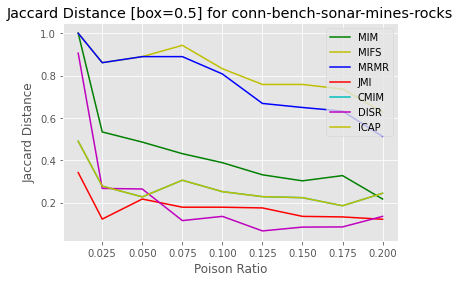

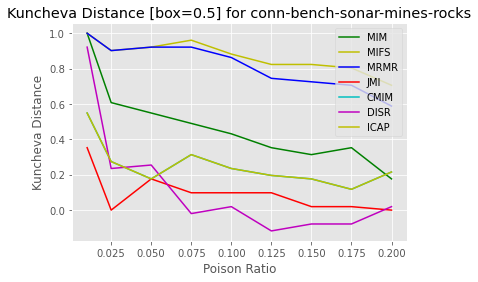

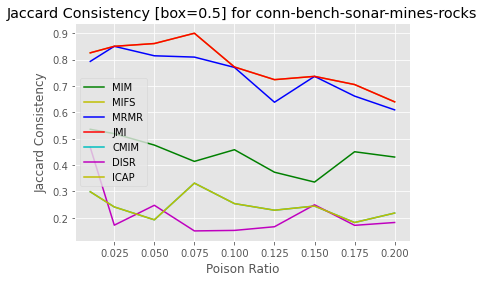

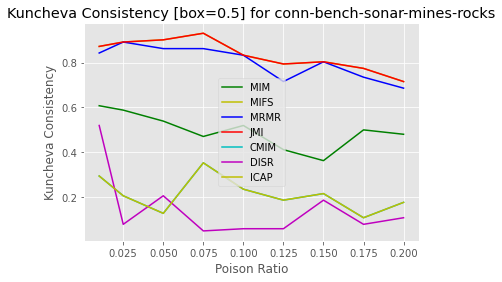

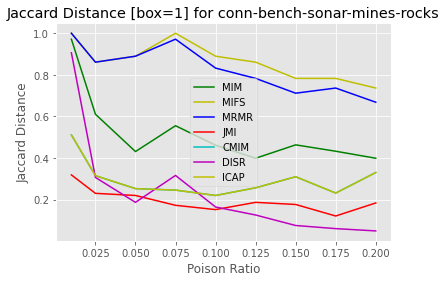

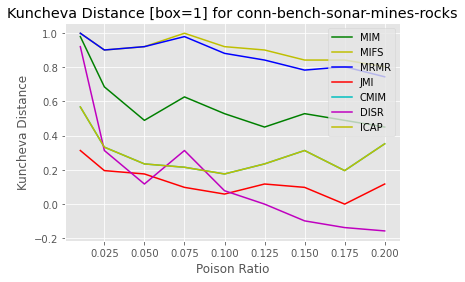

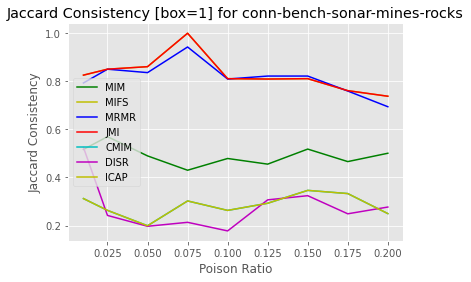

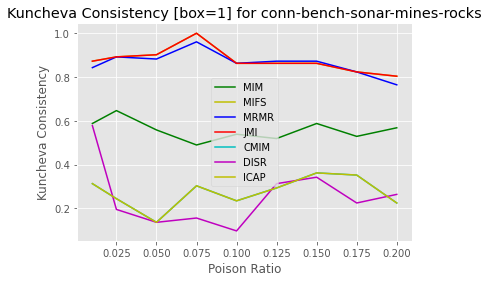

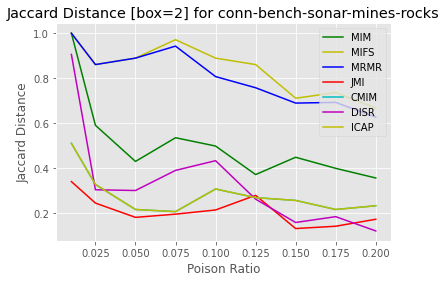

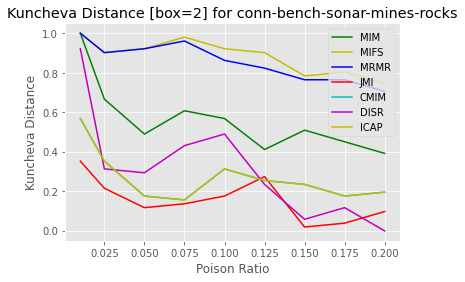

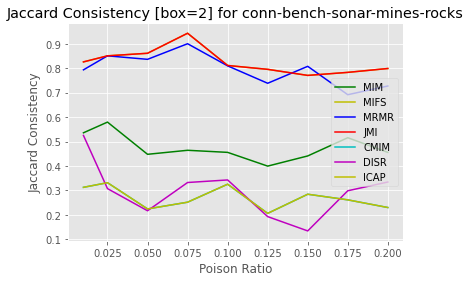

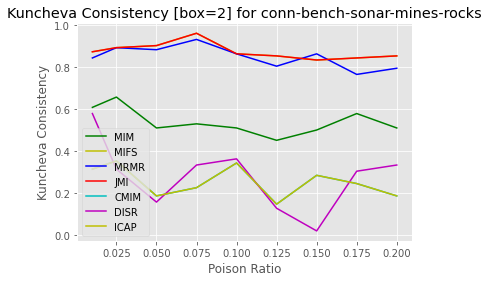

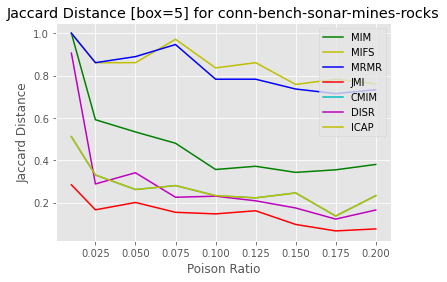

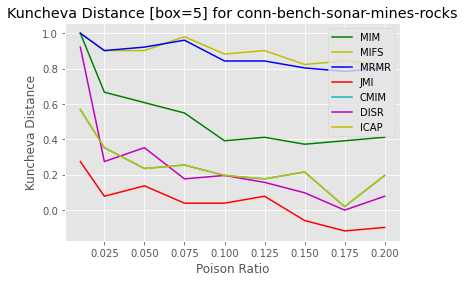

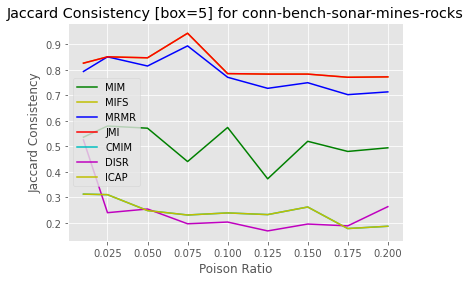

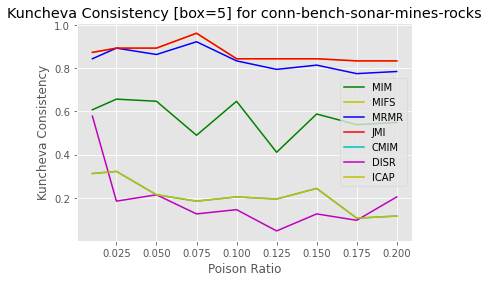

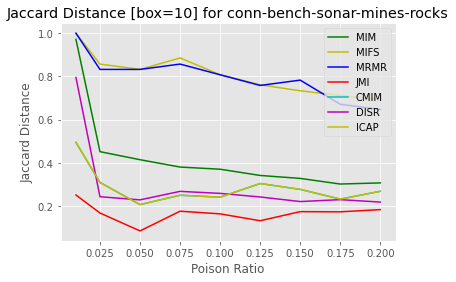

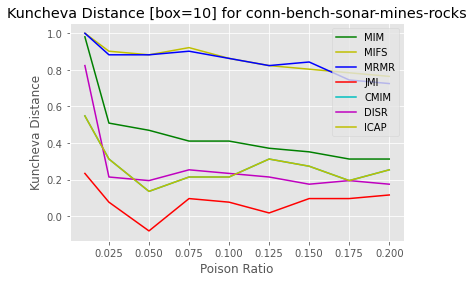

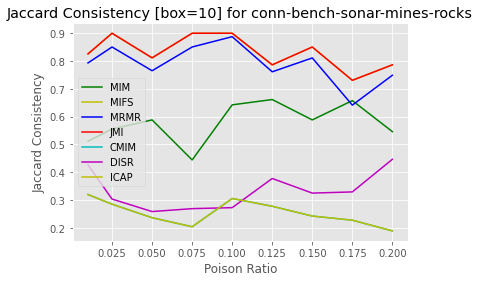

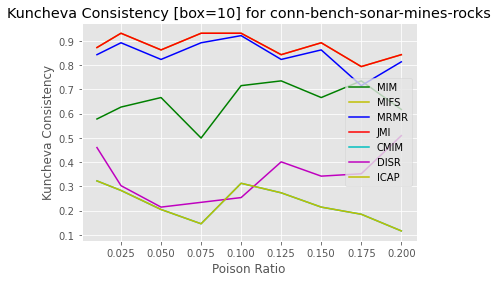

In [45]:
data = 'conn-bench-sonar-mines-rocks'
for i in range(len(BOX)): 
    d = np.load('IEEE/results/' + data + '_[xiao][' + BOX[i] + ']_results.npz')
    dist_jaccard, dist_kuncheva, consis_jaccard_clean, consis_kuncheva_clean, consis_jaccard_adv, consis_kuncheva_adv, Xa, X_pois= d['dist_jaccard'], \
    d['dist_kuncheva'], d['consis_jaccard_clean'], d['consis_kuncheva_clean'], d['consis_jaccard_adv'], d['consis_kuncheva_adv'], d['Xa'], d['Xtrk_pois']
    
    plt.figure()
    for j in range(dist_jaccard.shape[1]): 
        plt.plot(POI_RNG, dist_jaccard[:,j], color=clrs[j], label=ALGS[j], markersize=8)
    plt.legend()
    plt.xlabel('Poison Ratio')
    plt.ylabel('Jaccard Distance')
    plt.title('Jaccard Distance [box=' + BOX[i] + '] for '+ data)
    plt.savefig('IEEE/line_graphs/conn-bench/dist_jaccard_' + BOX[i] + '].pdf')
        
    plt.figure()
    for j in range(dist_kuncheva.shape[1]): 
            plt.plot(POI_RNG, dist_kuncheva[:,j], color=clrs[j], label=ALGS[j])
    plt.legend()
    plt.xlabel('Poison Ratio')
    plt.ylabel('Kuncheva Distance')
    plt.title('Kuncheva Distance [box=' + BOX[i] + '] for '+ data)
    plt.savefig('IEEE/line_graphs/conn-bench/dist_kuncheva_' + BOX[i] + '].pdf')
    
    plt.figure()
    for j in range(consis_jaccard_adv.shape[1]): 
            plt.plot(POI_RNG, consis_jaccard_adv[:,j], color=clrs[j], label=ALGS[j])
    plt.legend()
    plt.xlabel('Poison Ratio')
    plt.ylabel('Jaccard Consistency')
    plt.title('Jaccard Consistency [box=' + BOX[i] + '] for '+ data)
    plt.savefig('IEEE/line_graphs/conn-bench/consis_jaccard_' + BOX[i] + '].pdf')
        
    plt.figure()
    for j in range(consis_kuncheva_adv.shape[1]): 
            plt.plot(POI_RNG, consis_kuncheva_adv[:,j], color=clrs[j], label=ALGS[j])
    plt.legend()
    plt.xlabel('Poison Ratio')
    plt.ylabel('Kuncheva Consistency')
    plt.title('Kuncheva Consistency [box=' + BOX[i] + '] for '+ data)
    plt.savefig('IEEE/line_graphs/conn-bench/consis_kuncheva_'+ BOX[i] + '].pdf')

# mesh color plot

<ipython-input-51-47f92aa7b816>:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


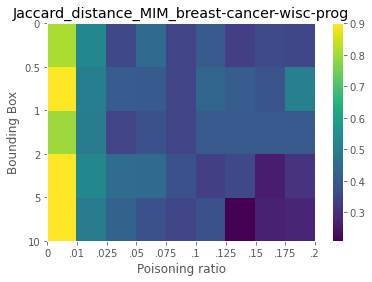

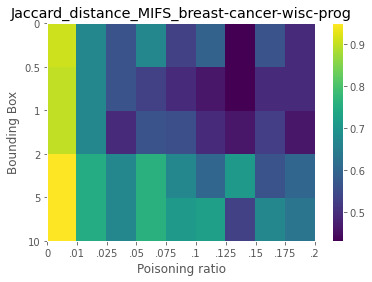

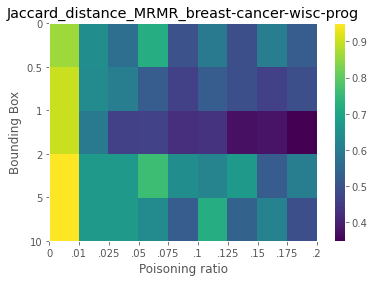

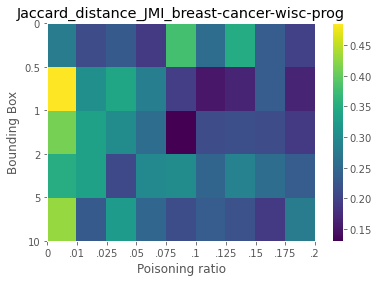

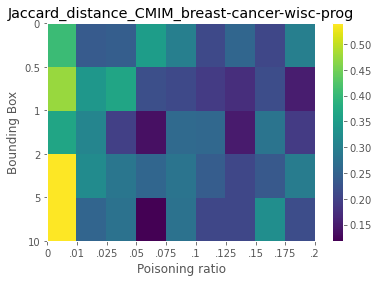

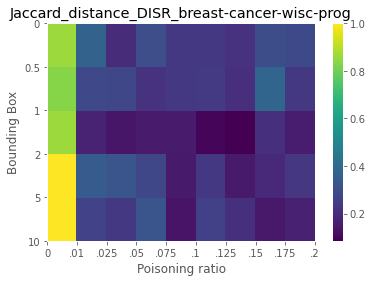

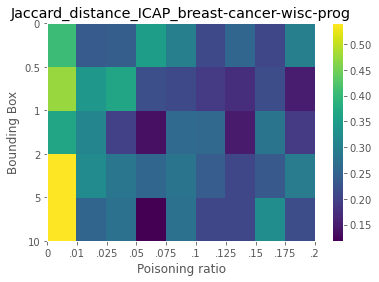

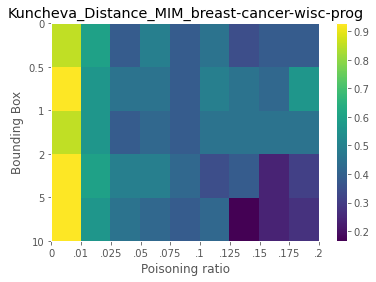

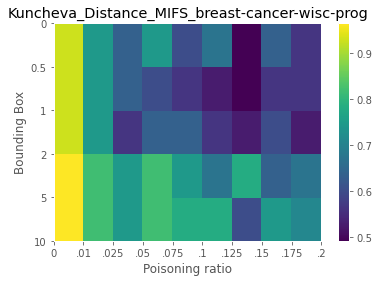

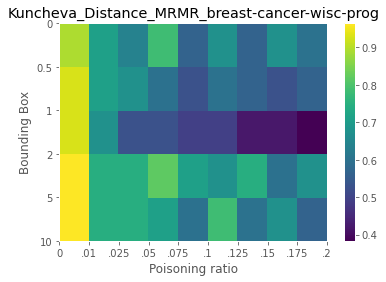

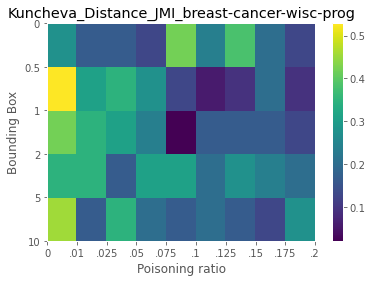

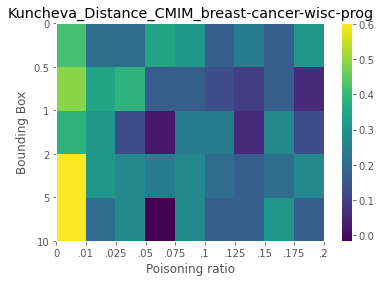

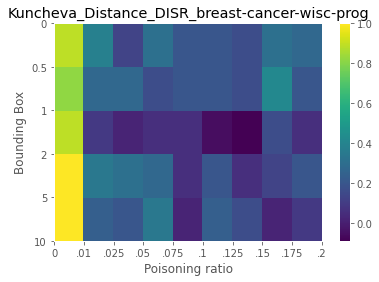

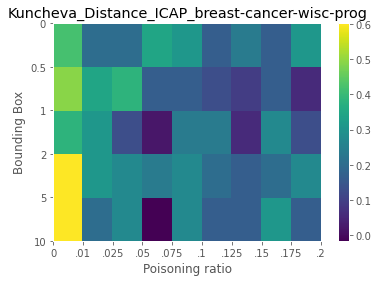

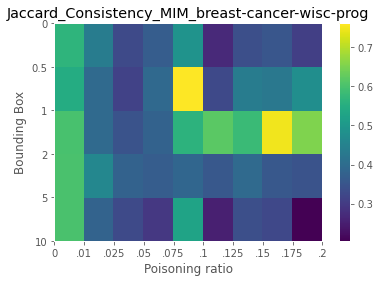

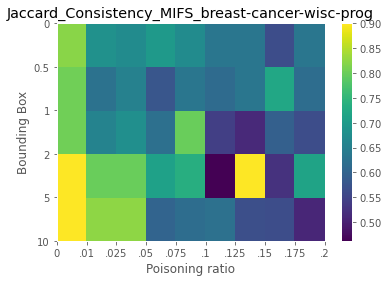

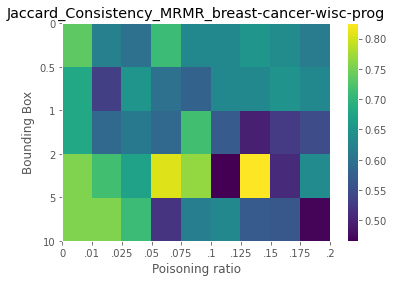

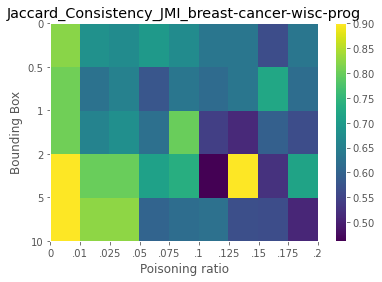

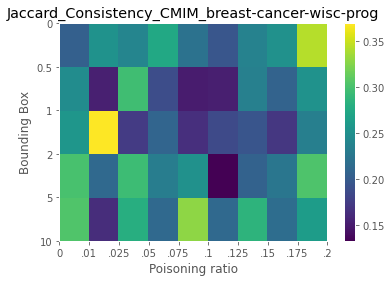

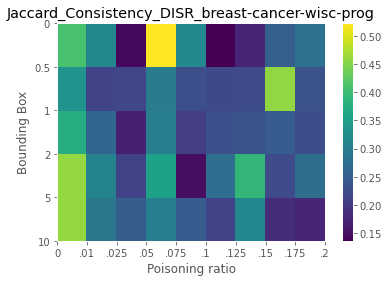

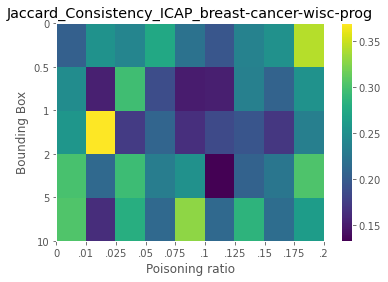

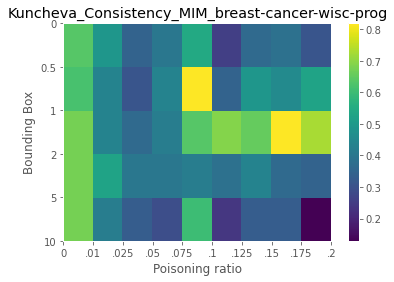

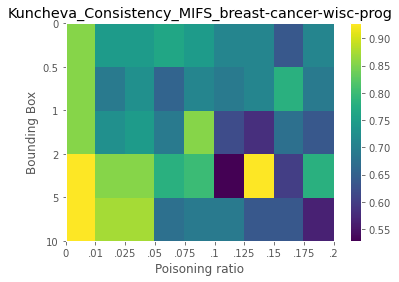

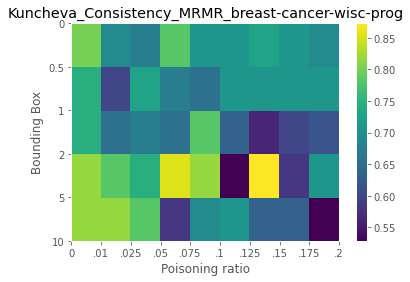

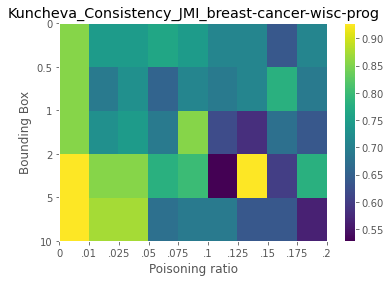

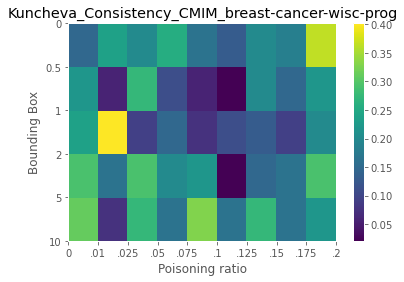

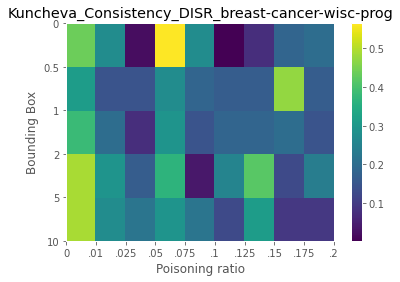

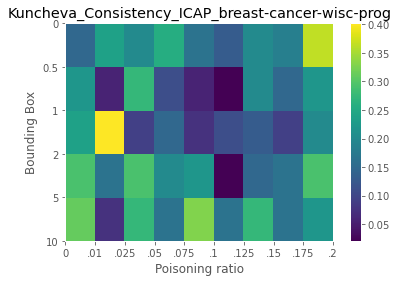

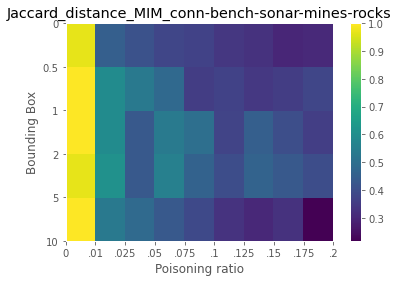

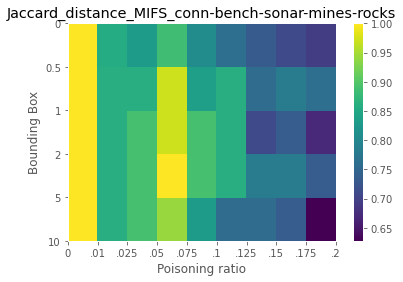

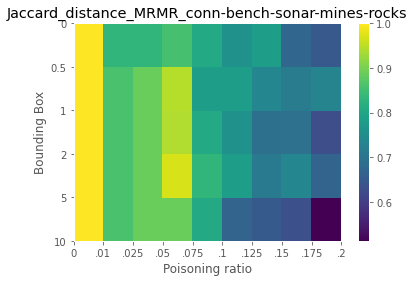

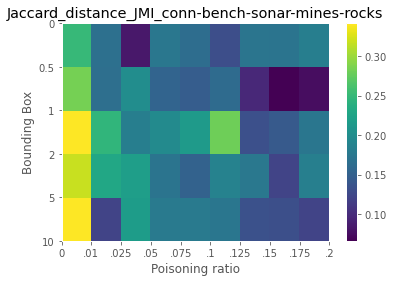

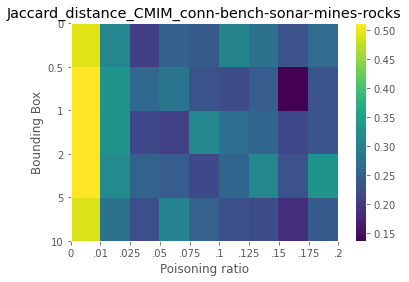

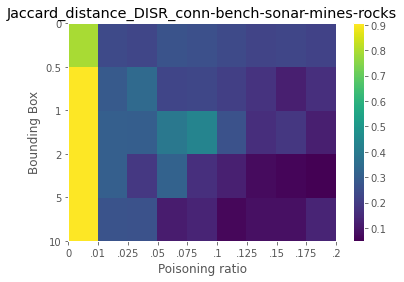

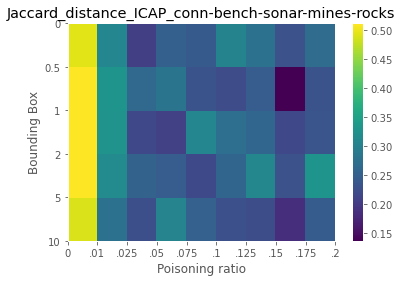

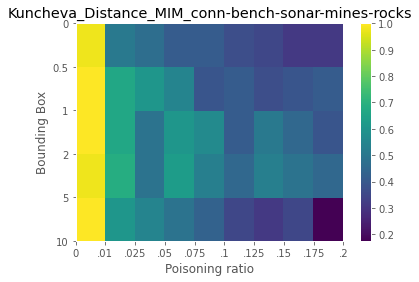

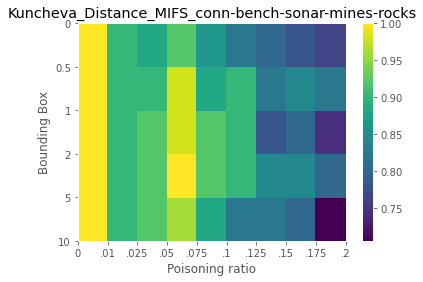

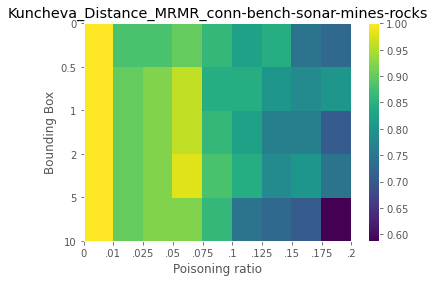

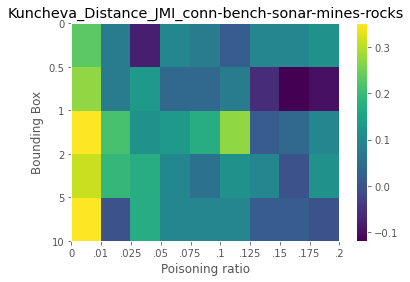

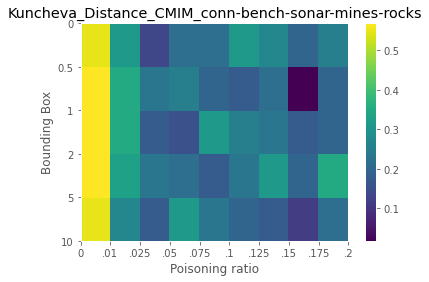

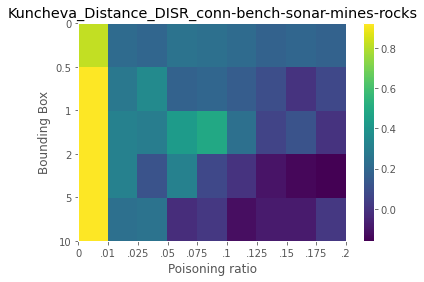

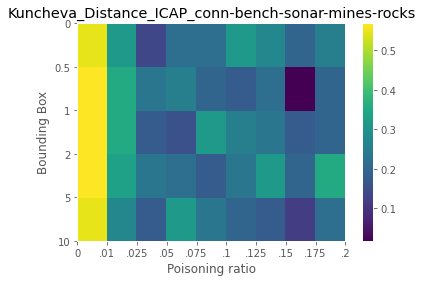

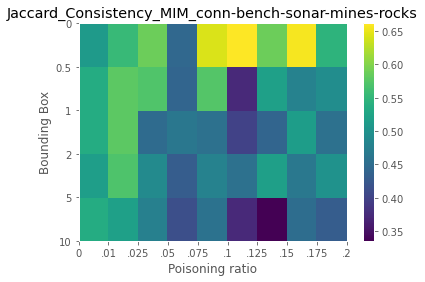

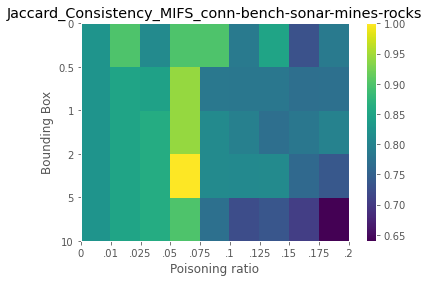

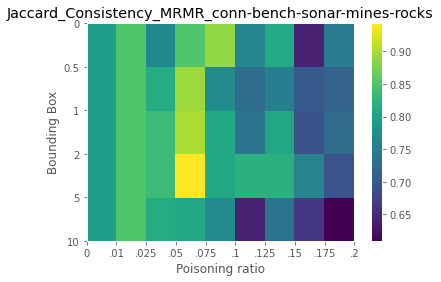

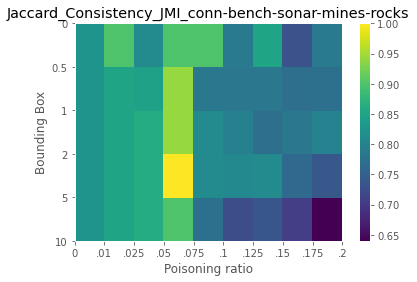

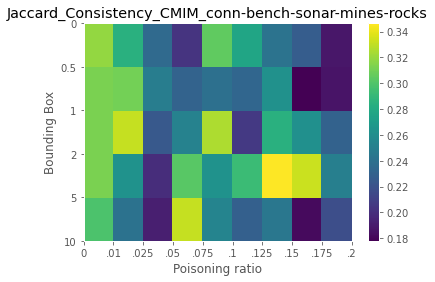

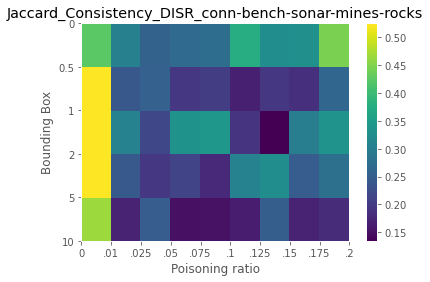

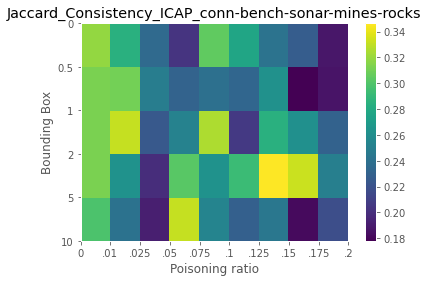

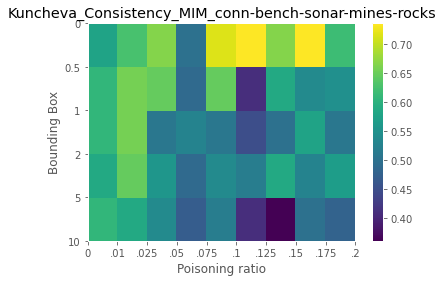

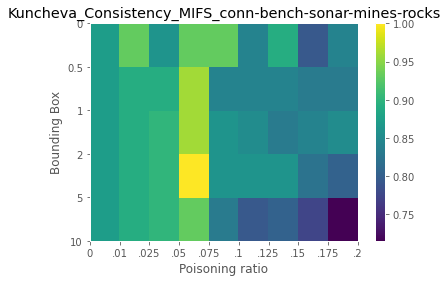

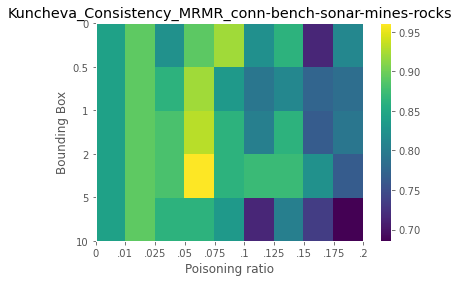

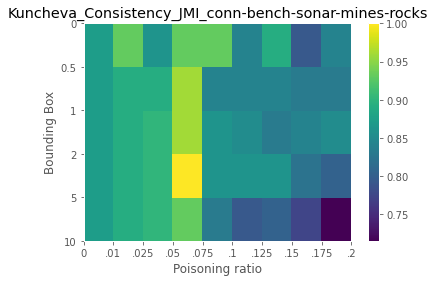

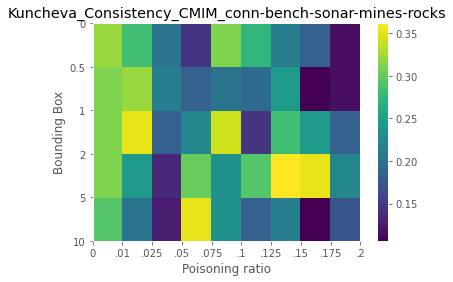

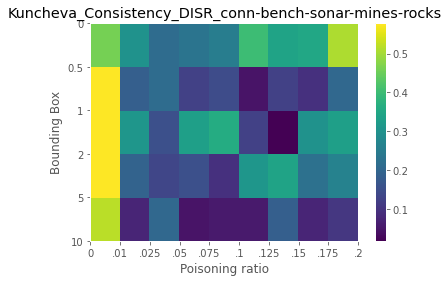

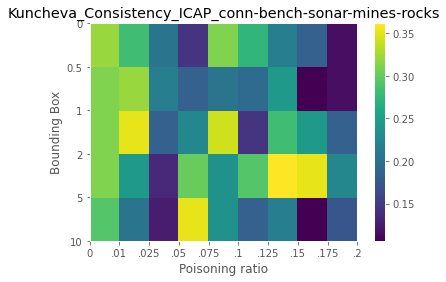

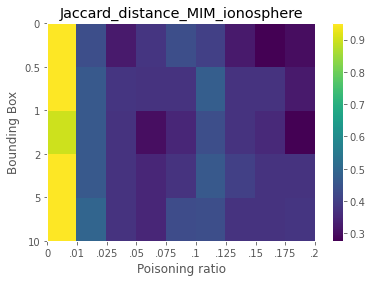

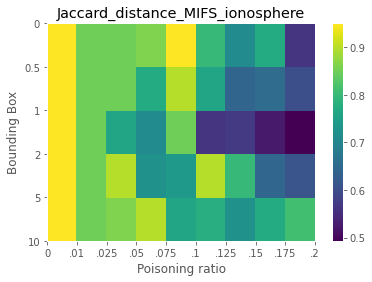

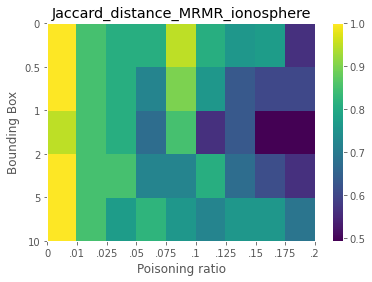

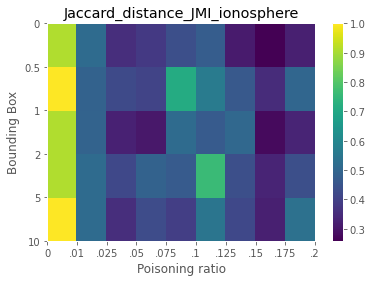

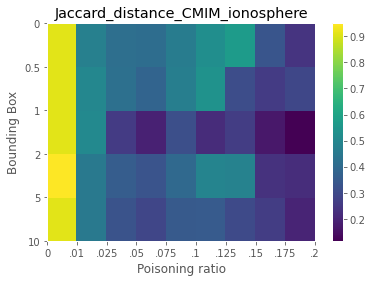

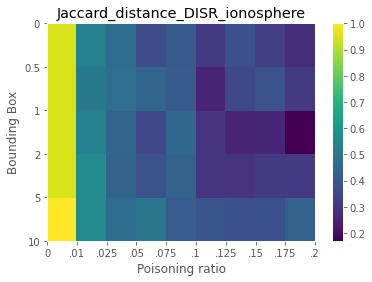

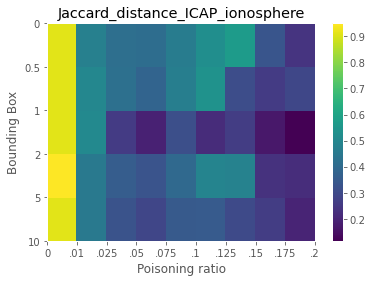

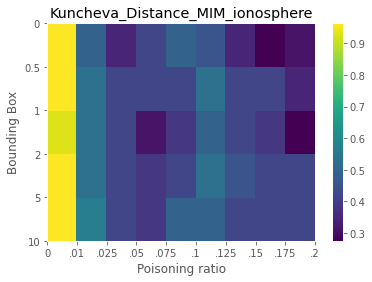

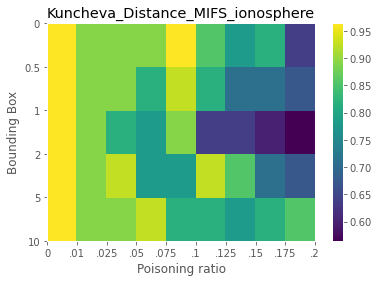

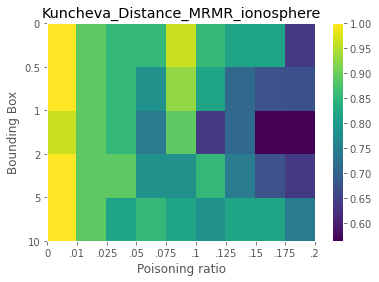

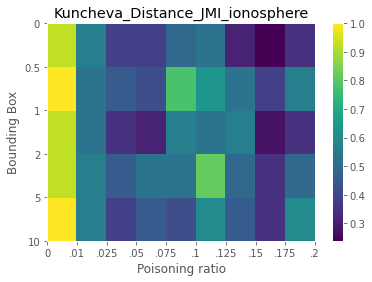

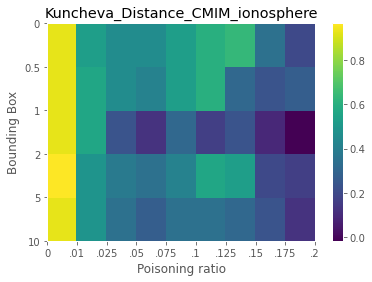

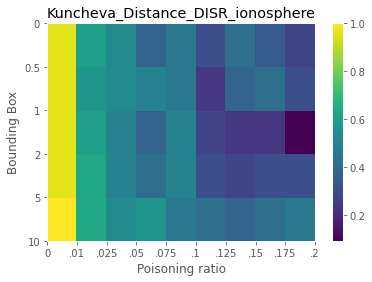

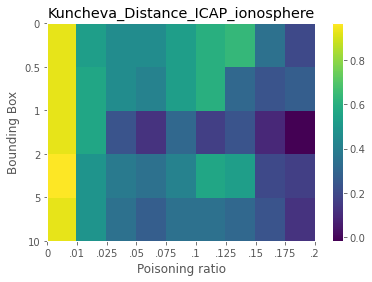

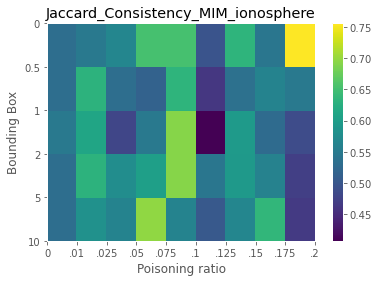

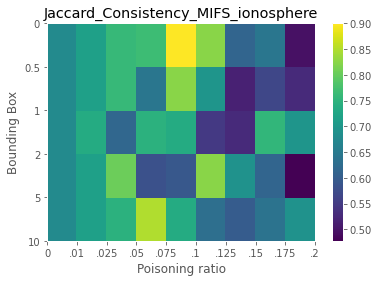

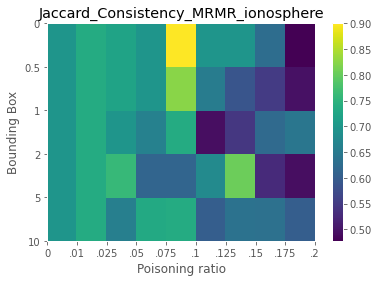

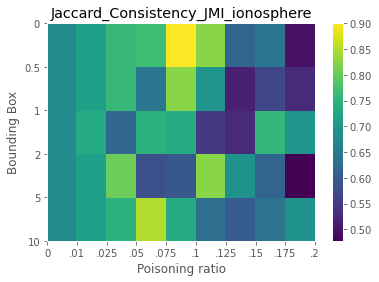

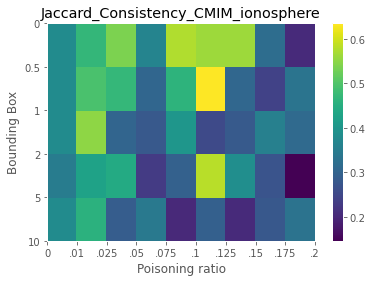

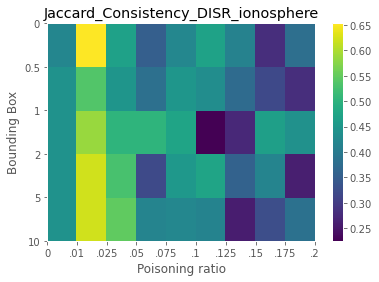

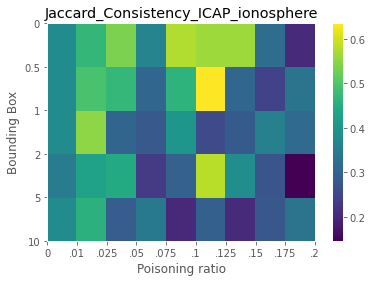

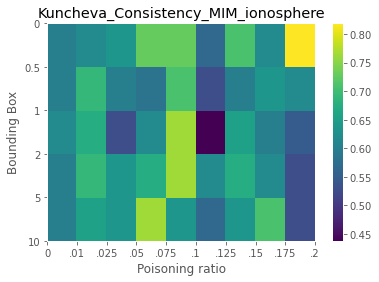

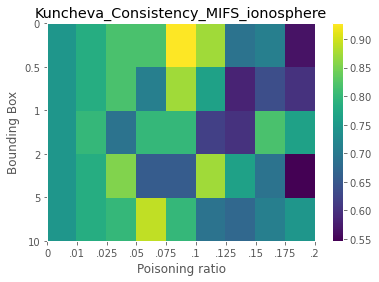

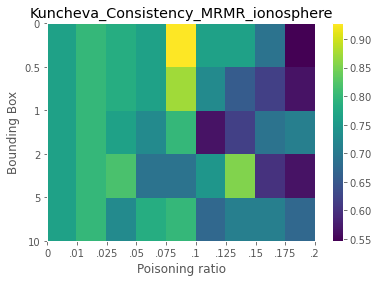

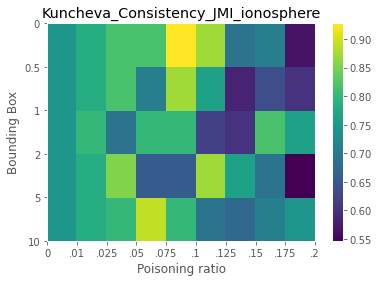

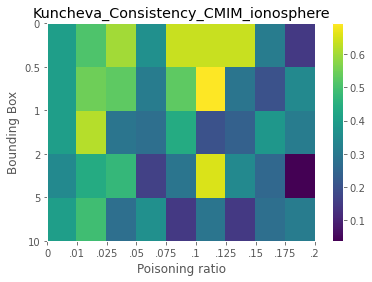

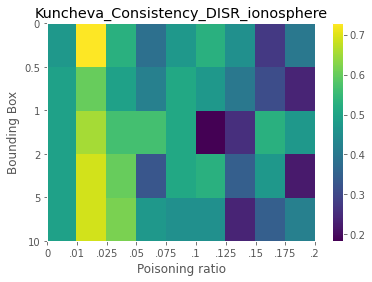

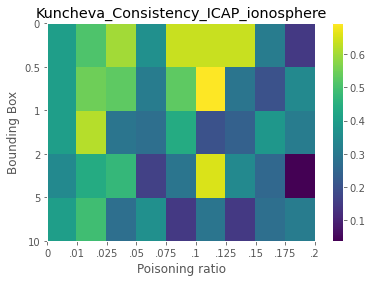

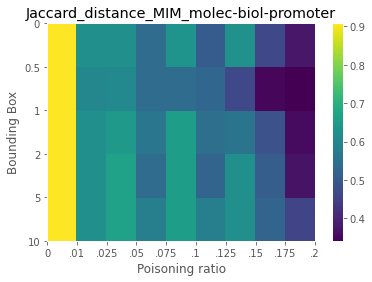

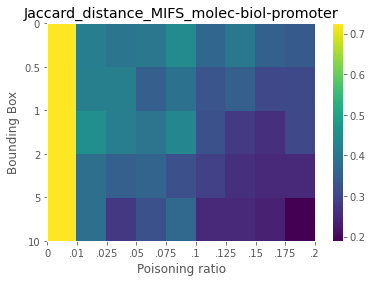

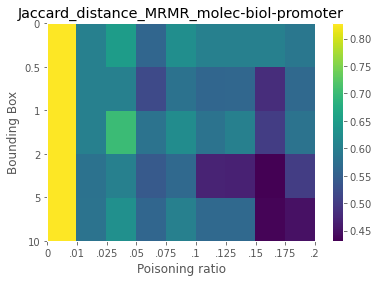

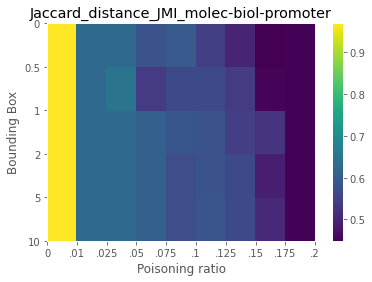

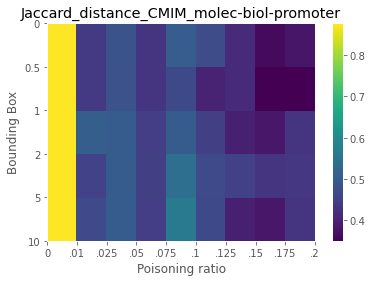

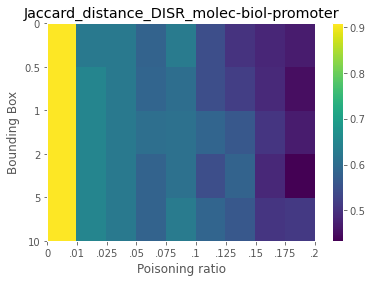

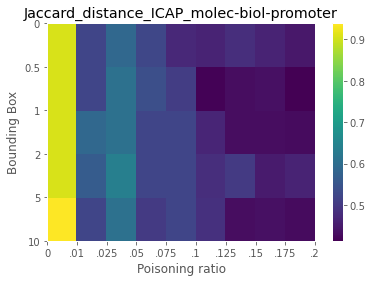

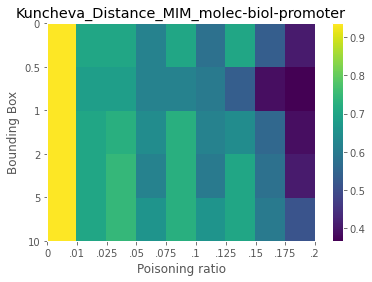

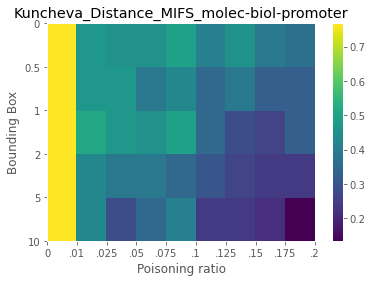

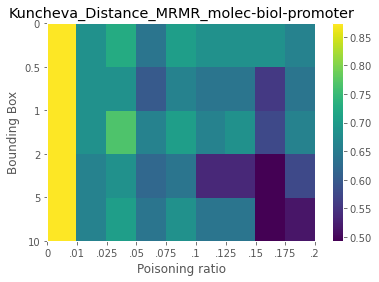

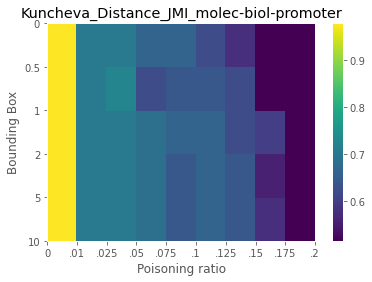

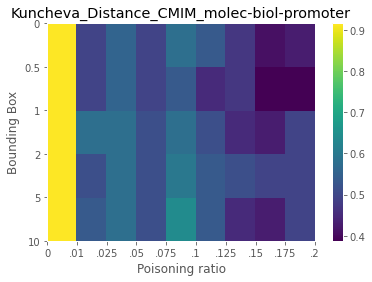

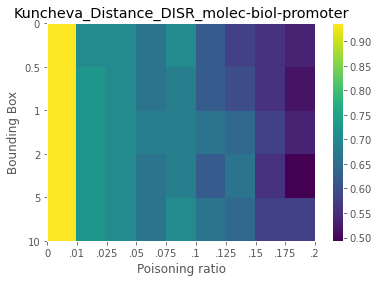

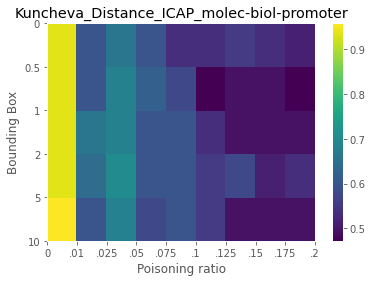

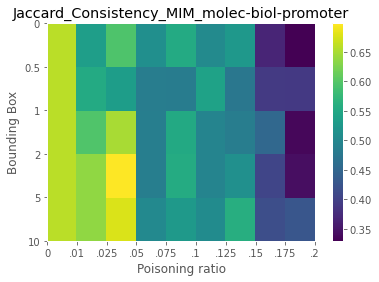

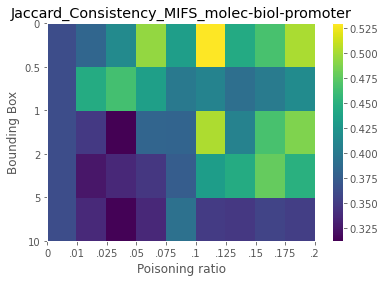

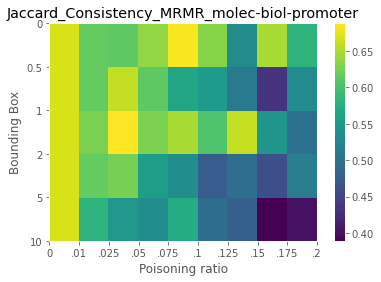

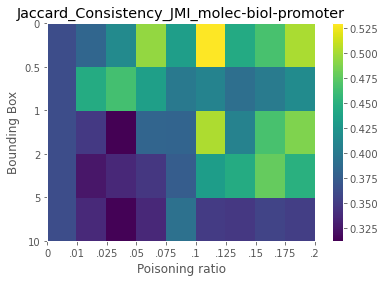

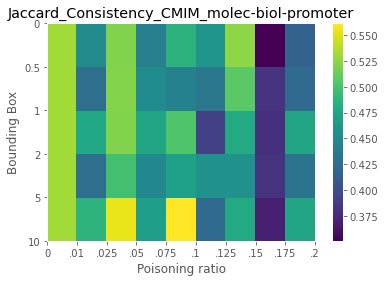

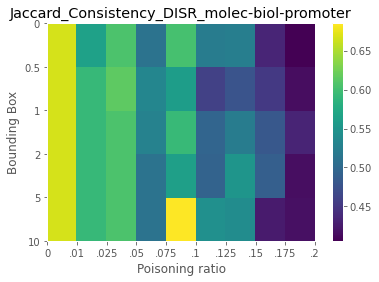

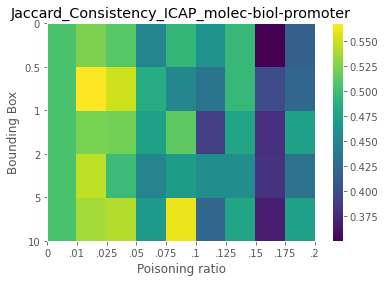

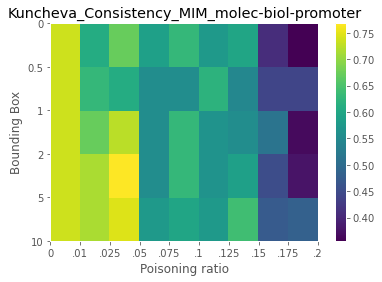

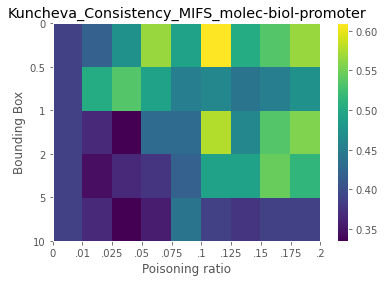

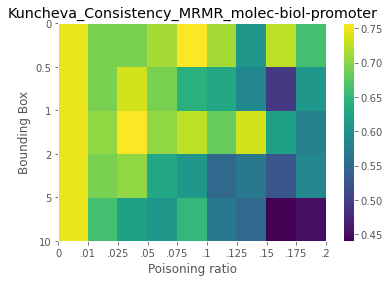

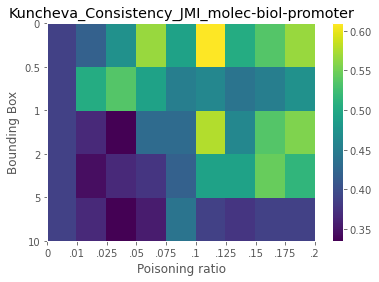

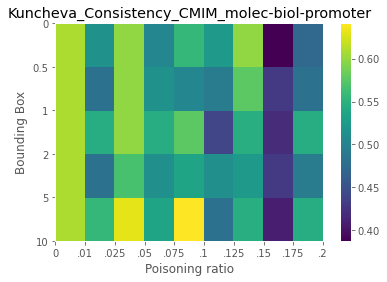

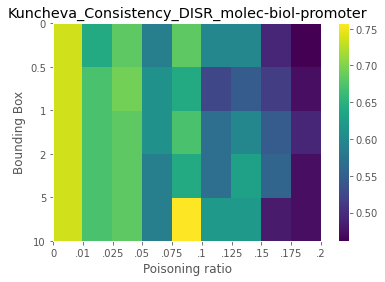

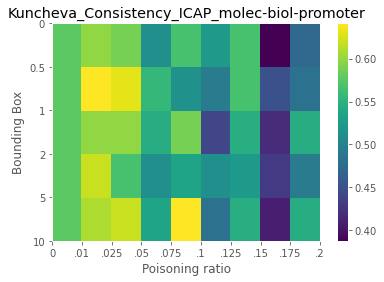

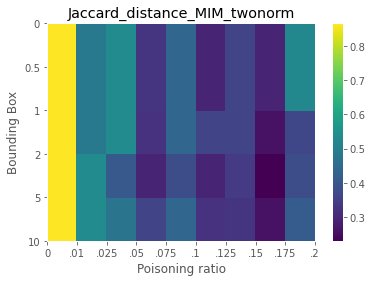

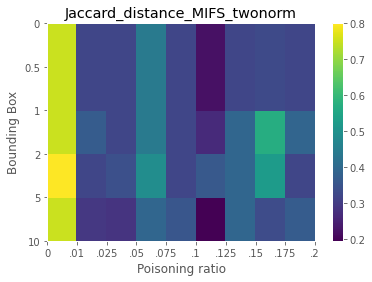

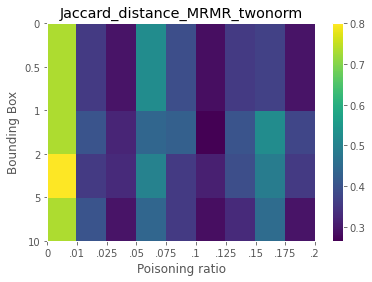

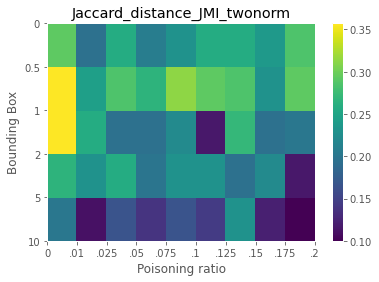

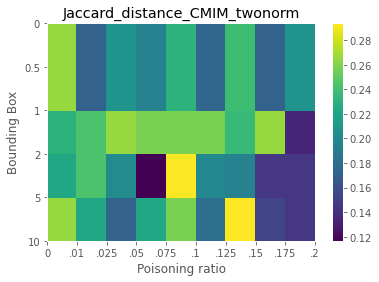

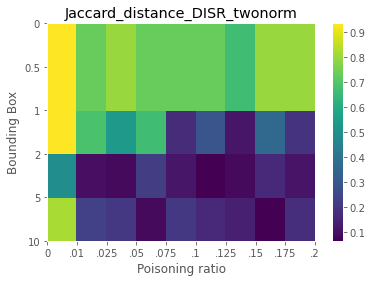

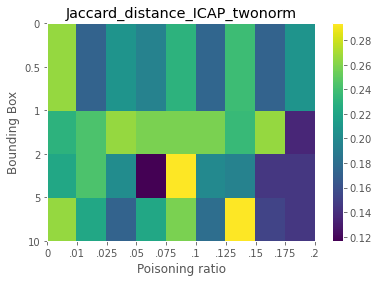

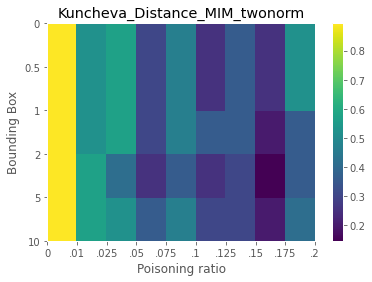

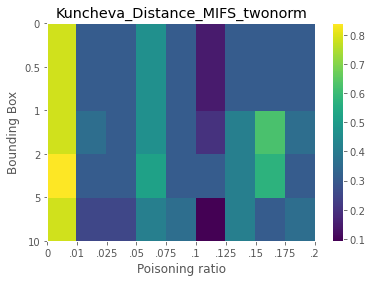

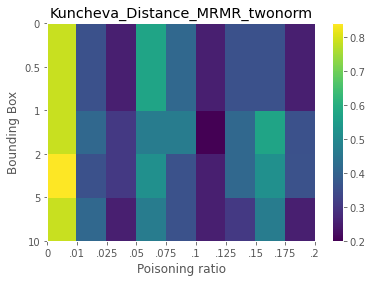

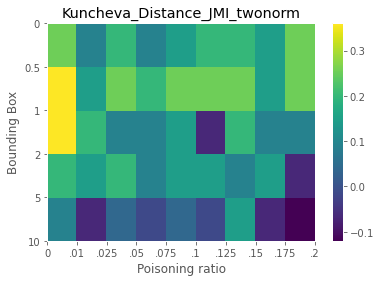

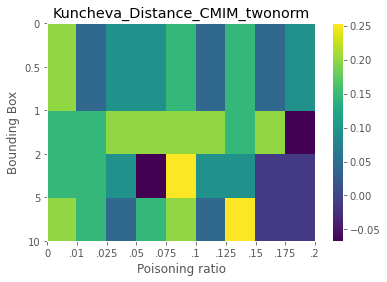

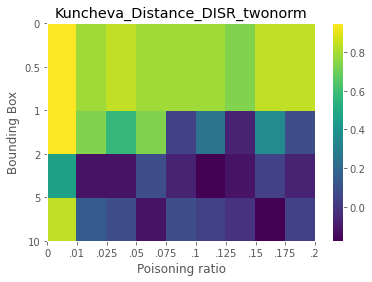

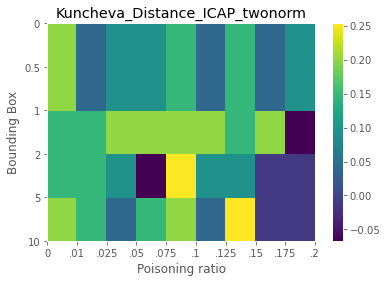

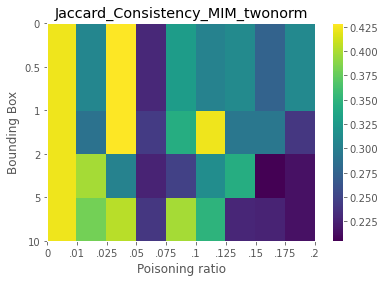

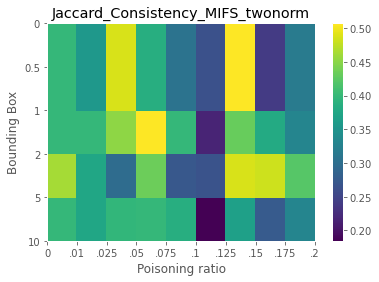

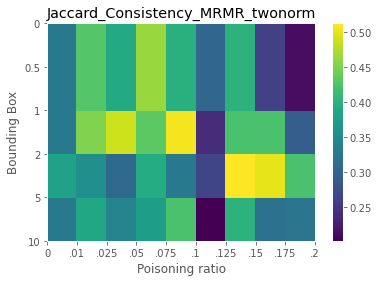

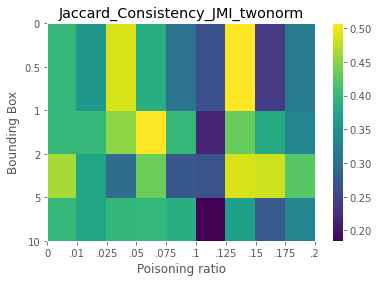

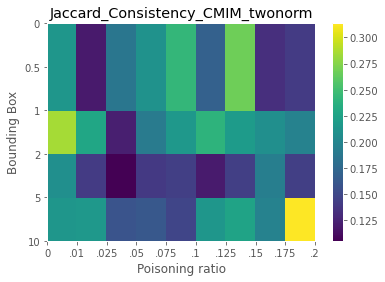

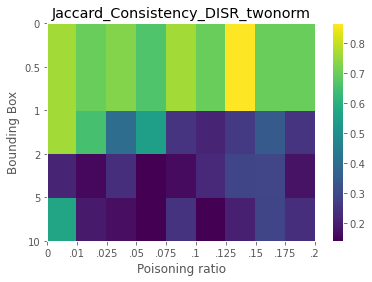

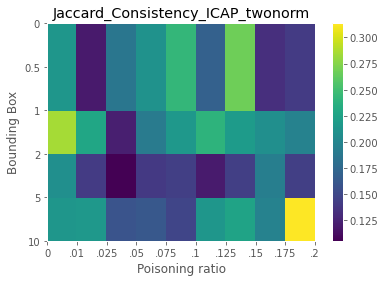

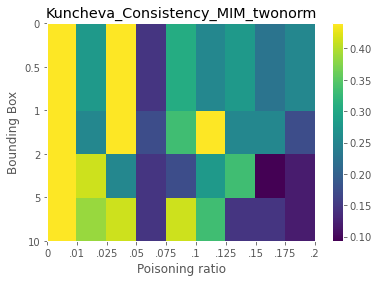

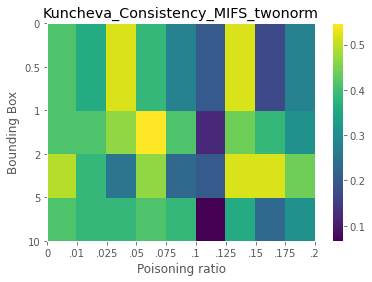

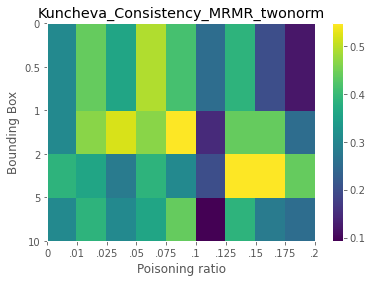

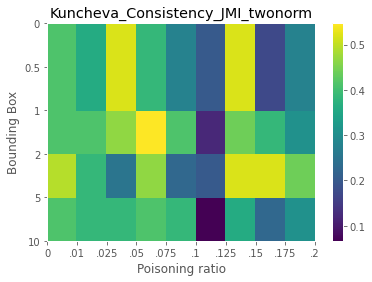

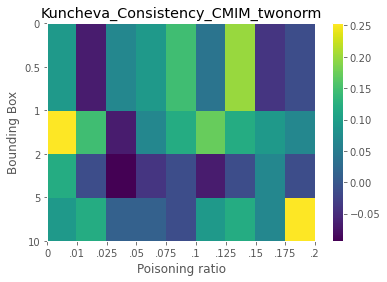

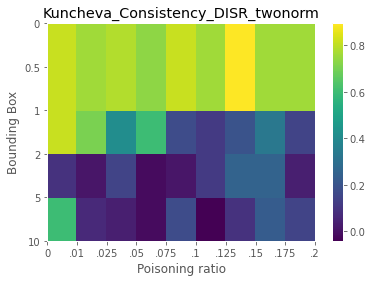

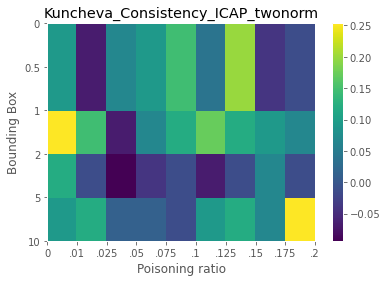

In [51]:
xval = np.array(['0', '.01', '.025', '.05', '.075', '.1', '.125', '.15', '.175', '.2'])
yval = np.array(['10', '5', '2', '1', '0.5', '0'])
param = ['Jaccard_distance', 'Kuncheva_Distance', 'Jaccard_Consistency', 'Kuncheva_Consistency']
for l in range(len(DATA)): 
    M = [] 
    Jacc_dist = []
    Kunch_dist = []
    Jacc_consis = []
    Kunch_consis = []
    for i in range(len(BOX)): 
        d = np.load('IEEE/results/' + DATA[l] + '_[xiao][' + BOX[i] + ']_results.npz')
        Jacc_dist.append(d['dist_jaccard'])
        Kunch_dist.append(d['dist_kuncheva'])
        Jacc_consis.append(d['consis_jaccard_adv'])
        Kunch_consis.append(d['consis_kuncheva_adv'])   
    
    # Packing Jacc_dist, Kunch_dist, Jacc_consis and Kunch_consis list in single list M for unpacking later while assignment
    M.append(Jacc_dist)
    M.append(Kunch_dist)
    M.append(Jacc_consis)
    M.append(Kunch_consis)
        
    # (5x9)x4x7 matrix holding matrices of size 5x9
    mesh_M_A = np.zeros((len(param), NALG, len(BOX), NPR))
    for row in range(len(param)):
        for col in range(len(ALGS)):
            for b in range(len(M[0])):
                mesh_M_A[row][col][b,:] = M[row][b][:, col]
            
            #plt.figure()
            fig, ax = plt.subplots()
            c = ax.pcolormesh(xval, yval, mesh_M_A[row][col]) #, cmap = 'RdBu')
            plt.colorbar(c)
            plt.xlabel('Poisoning ratio')
            plt.ylabel('Bounding Box')       # Box values are in ascending order top to bottom, ie, 6 on yaxis refers to BOX[0] and consequently 1 on yaxis refers to Box[5]
            plt.title(str(param[row])+ '_'+ str(ALGS[col]) + '_'+ str(DATA[l]))
            plt.savefig('IEEE/colormesh_plots/'+ param[row]+ '_'+ ALGS[col] + '_'+ DATA[l]+ '.pdf')

# 6 Algo: MIM, MIFS, MRMR, DISR, Relief, Fisher

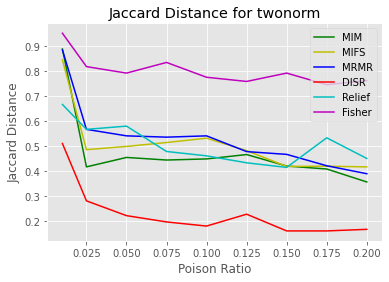

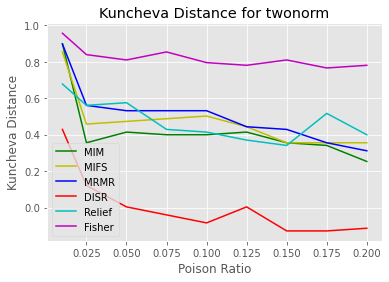

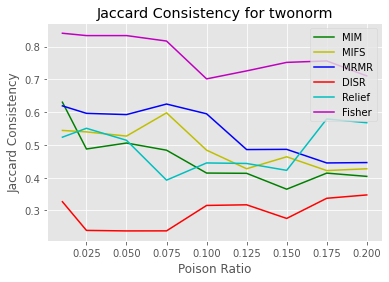

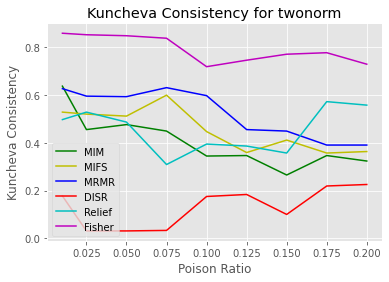

In [4]:
# molec-biol-promoter, conn-bench-sonar-mines-rocks, breast-cancer-wisc-prog, ionosphere, twonorm, musk-1
data = 'twonorm'
BOX = ['0.5']
NALG = 6
ALGS = ['MIM', 'MIFS', 'MRMR', 'DISR', 'Relief', 'Fisher']
for i in range(len(BOX)): 
    d = np.load('results/npz_files/' + data + '_[xiao][' + BOX[i] + ']_results.npz')
    dist_jaccard, dist_kuncheva, consis_jaccard_clean, consis_kuncheva_clean, consis_jaccard_adv, consis_kuncheva_adv, Xa, X_pois= d['dist_jaccard'], \
    d['dist_kuncheva'], d['consis_jaccard_clean'], d['consis_kuncheva_clean'], d['consis_jaccard_adv'], d['consis_kuncheva_adv'], d['Xa'], d['Xtrk_pois']
    
    plt.figure()
    for j in range(dist_jaccard.shape[1]): 
        plt.plot(POI_RNG, dist_jaccard[:,j], color=clrs[j], label=ALGS[j], markersize=8)
    plt.legend()
    plt.xlabel('Poison Ratio')
    plt.ylabel('Jaccard Distance')
    plt.title('Jaccard Distance for '+ data)
    plt.savefig('results/line_graphs/dist_jaccard_' + data +'_[' + BOX[i] + '].pdf')
        
    plt.figure()
    for j in range(dist_kuncheva.shape[1]): 
            plt.plot(POI_RNG, dist_kuncheva[:,j], color=clrs[j], label=ALGS[j])
    plt.legend()
    plt.xlabel('Poison Ratio')
    plt.ylabel('Kuncheva Distance')
    plt.title('Kuncheva Distance for '+ data)
    plt.savefig('results/line_graphs/dist_kuncheva_' + data +'_[' + BOX[i] + '].pdf')
    
    plt.figure()
    for j in range(consis_jaccard_adv.shape[1]): 
            plt.plot(POI_RNG, consis_jaccard_adv[:,j], color=clrs[j], label=ALGS[j])
    plt.legend()
    plt.xlabel('Poison Ratio')
    plt.ylabel('Jaccard Consistency')
    plt.title('Jaccard Consistency for '+ data)
    plt.savefig('results/line_graphs/consis_jaccard_' + data +'_[' + BOX[i] + '].pdf')
        
    plt.figure()
    for j in range(consis_kuncheva_adv.shape[1]): 
            plt.plot(POI_RNG, consis_kuncheva_adv[:,j], color=clrs[j], label=ALGS[j])
    plt.legend()
    plt.xlabel('Poison Ratio')
    plt.ylabel('Kuncheva Consistency')
    plt.title('Kuncheva Consistency for '+ data)
    plt.savefig('results/line_graphs/consis_kuncheva_' + data +'_[' + BOX[i] + '].pdf')

# 4 Algo: MIM, MIFS, MRMR, DISR

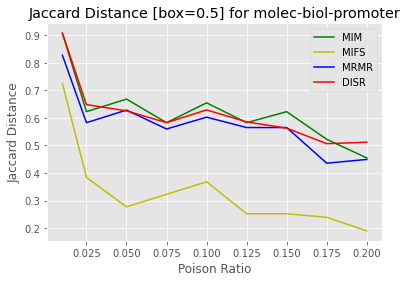

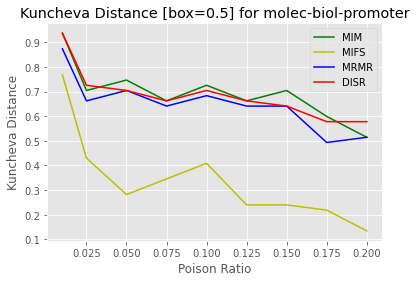

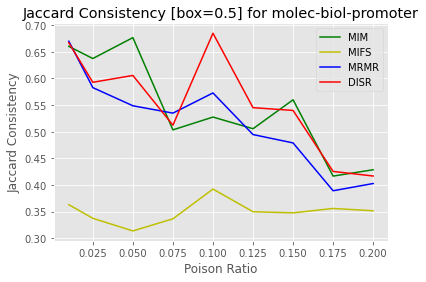

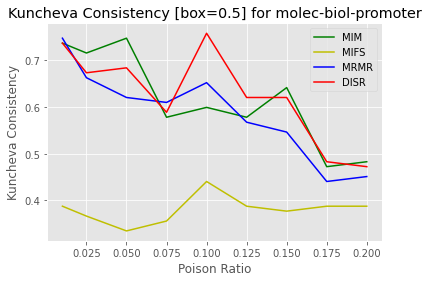

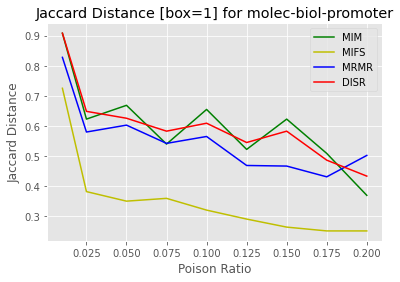

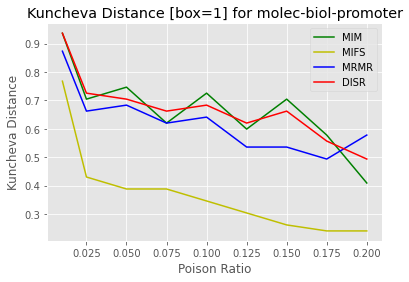

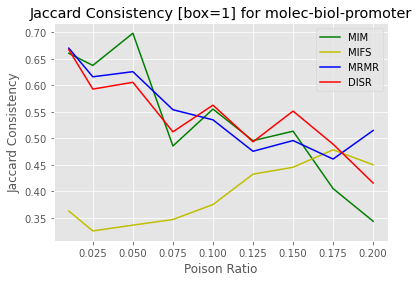

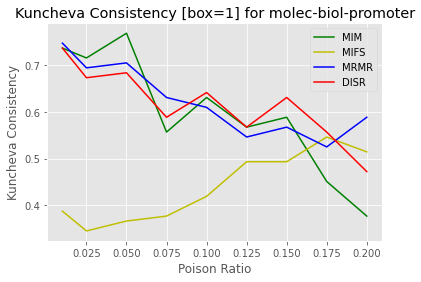

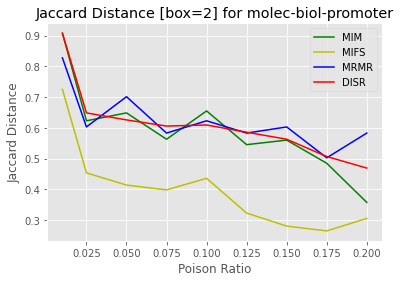

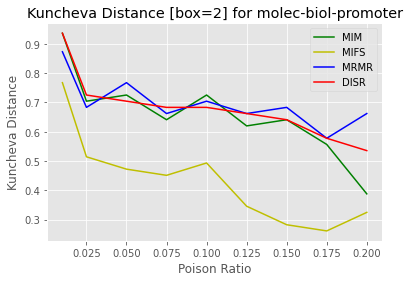

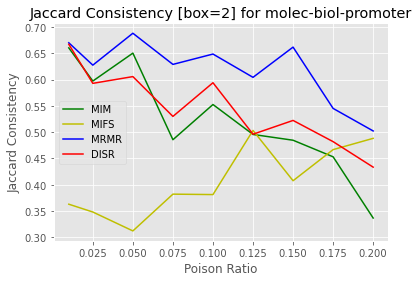

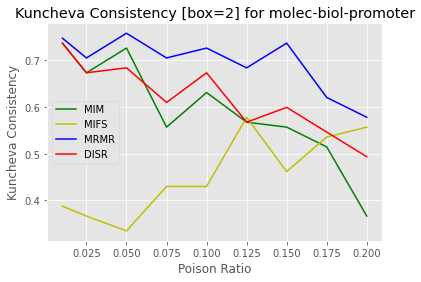

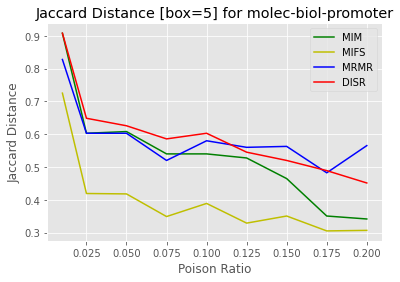

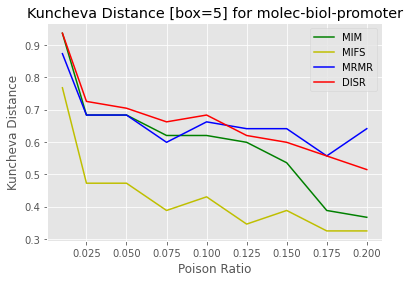

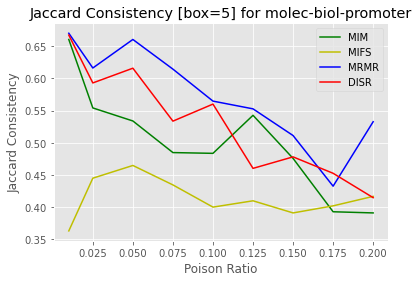

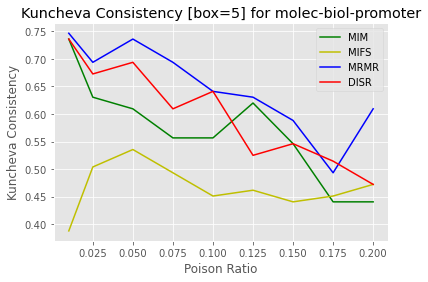

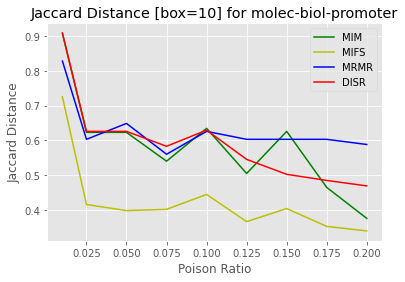

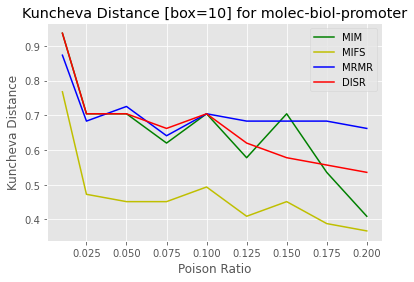

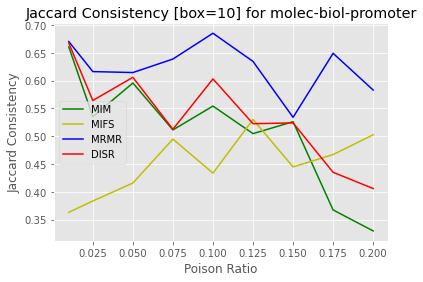

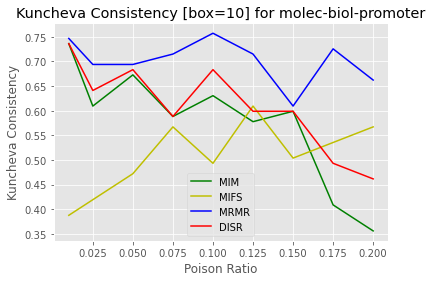

In [30]:
data = 'molec-biol-promoter'
NALG = 4
ALGS = ['MIM', 'MIFS', 'MRMR', 'DISR'] #, 'Relief', 'Fisher']
for i in range(len(BOX)): 
    d = np.load('IEEE/4_algs/results/' + data + '_[xiao][' + BOX[i] + ']_results.npz')
    dist_jaccard, dist_kuncheva, consis_jaccard_clean, consis_kuncheva_clean, consis_jaccard_adv, consis_kuncheva_adv, Xa, X_pois= d['dist_jaccard'], \
    d['dist_kuncheva'], d['consis_jaccard_clean'], d['consis_kuncheva_clean'], d['consis_jaccard_adv'], d['consis_kuncheva_adv'], d['Xa'], d['Xtrk_pois']
    
    plt.figure()
    for j in range(dist_jaccard.shape[1]): 
        plt.plot(POI_RNG, dist_jaccard[:,j], color=clrs[j], label=ALGS[j], markersize=8)
    plt.legend()
    plt.xlabel('Poison Ratio')
    plt.ylabel('Jaccard Distance')
    plt.title('Jaccard Distance [box=' + BOX[i] + '] for '+ data)
    plt.savefig('IEEE/4_algs/line_graphs/molec-biol/dist_jaccard_[' + BOX[i] + '].pdf')
        
    plt.figure()
    for j in range(dist_kuncheva.shape[1]): 
            plt.plot(POI_RNG, dist_kuncheva[:,j], color=clrs[j], label=ALGS[j])
    plt.legend()
    plt.xlabel('Poison Ratio')
    plt.ylabel('Kuncheva Distance')
    plt.title('Kuncheva Distance [box=' + BOX[i] + '] for '+ data)
    plt.savefig('IEEE/4_algs/line_graphs/molec-biol/dist_kuncheva_[' + BOX[i] + '].pdf')
    
    plt.figure()
    for j in range(consis_jaccard_adv.shape[1]): 
            plt.plot(POI_RNG, consis_jaccard_adv[:,j], color=clrs[j], label=ALGS[j])
    plt.legend()
    plt.xlabel('Poison Ratio')
    plt.ylabel('Jaccard Consistency')
    plt.title('Jaccard Consistency [box=' + BOX[i] + '] for '+ data)
    plt.savefig('IEEE/4_algs/line_graphs/molec-biol/consis_jaccard_[' + BOX[i] + '].pdf')
        
    plt.figure()
    for j in range(consis_kuncheva_adv.shape[1]): 
            plt.plot(POI_RNG, consis_kuncheva_adv[:,j], color=clrs[j], label=ALGS[j])
    plt.legend()
    plt.xlabel('Poison Ratio')
    plt.ylabel('Kuncheva Consistency')
    plt.title('Kuncheva Consistency [box=' + BOX[i] + '] for '+ data)
    plt.savefig('IEEE/4_algs/line_graphs/molec-biol/consis_kuncheva_['+ BOX[i] + '].pdf')